## Trực quan hóa dữ liệu chuyên sâu (Tiếp tục)

Chúng ta sẽ tạo thêm các biểu đồ để khám phá sâu hơn các mối quan hệ giữa các đặc trưng và chất lượng rượu vang, tập trung vào việc làm nổi bật các pattern tiềm ẩn trong dữ liệu.

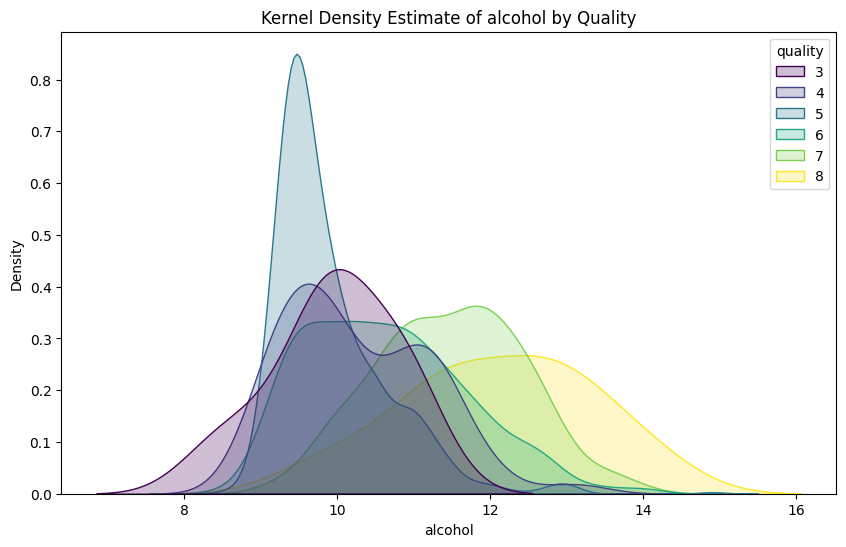

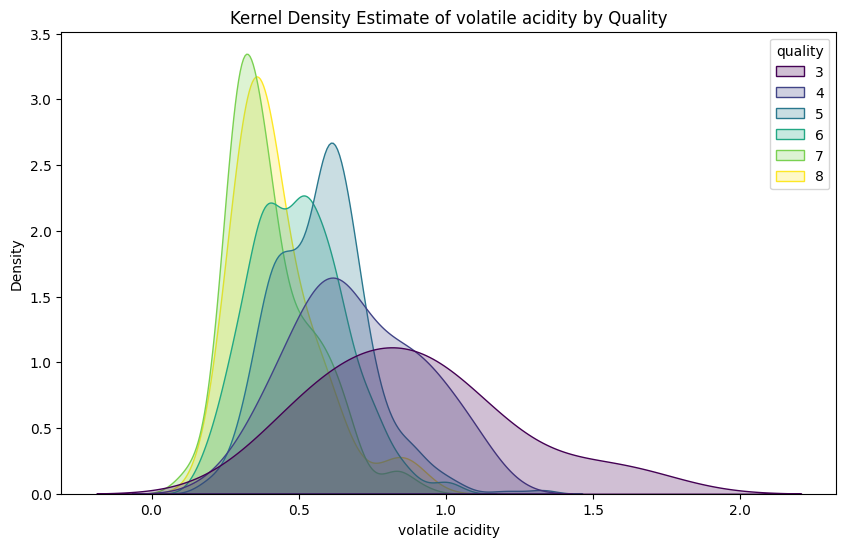

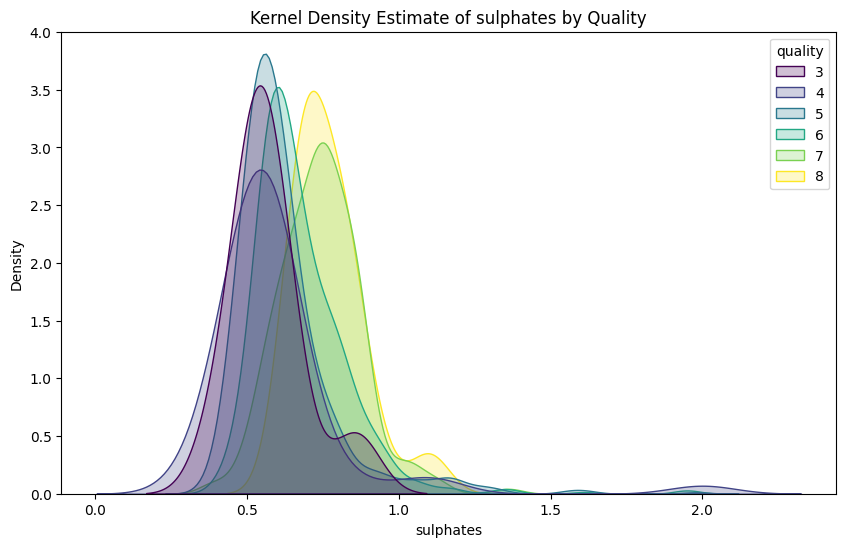

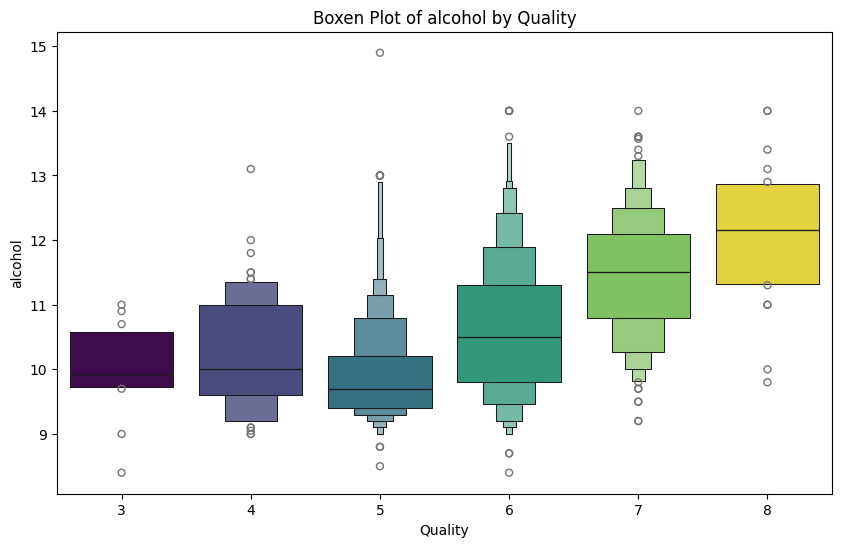

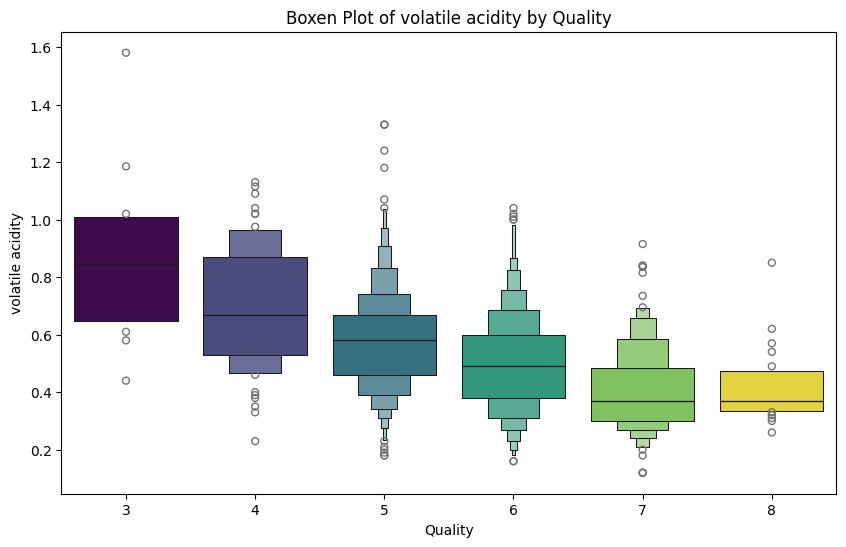

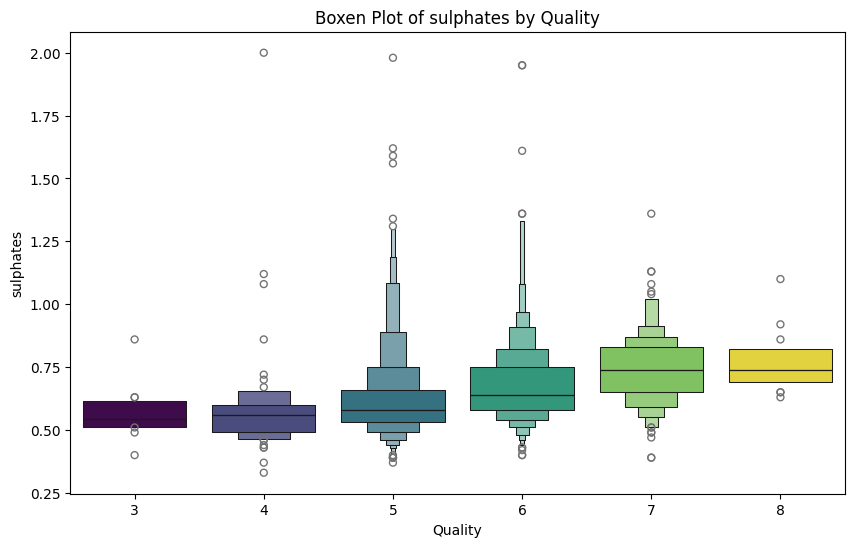

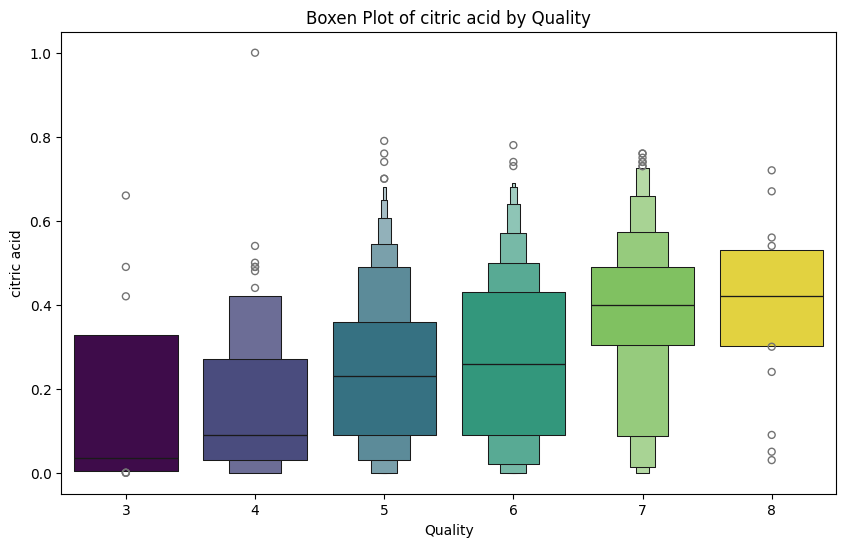

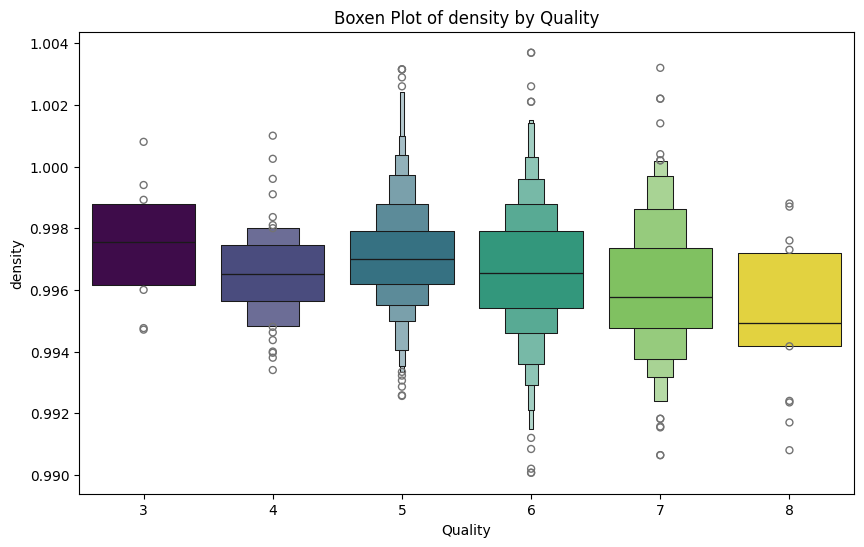

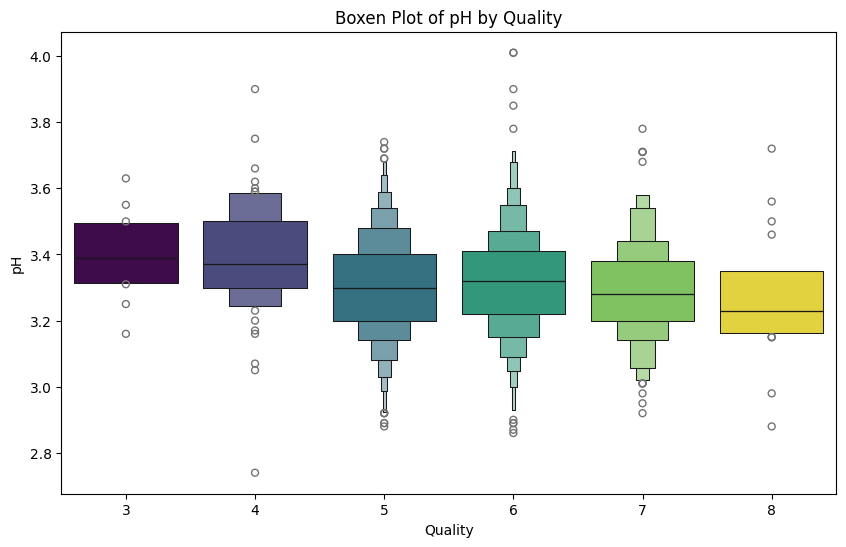

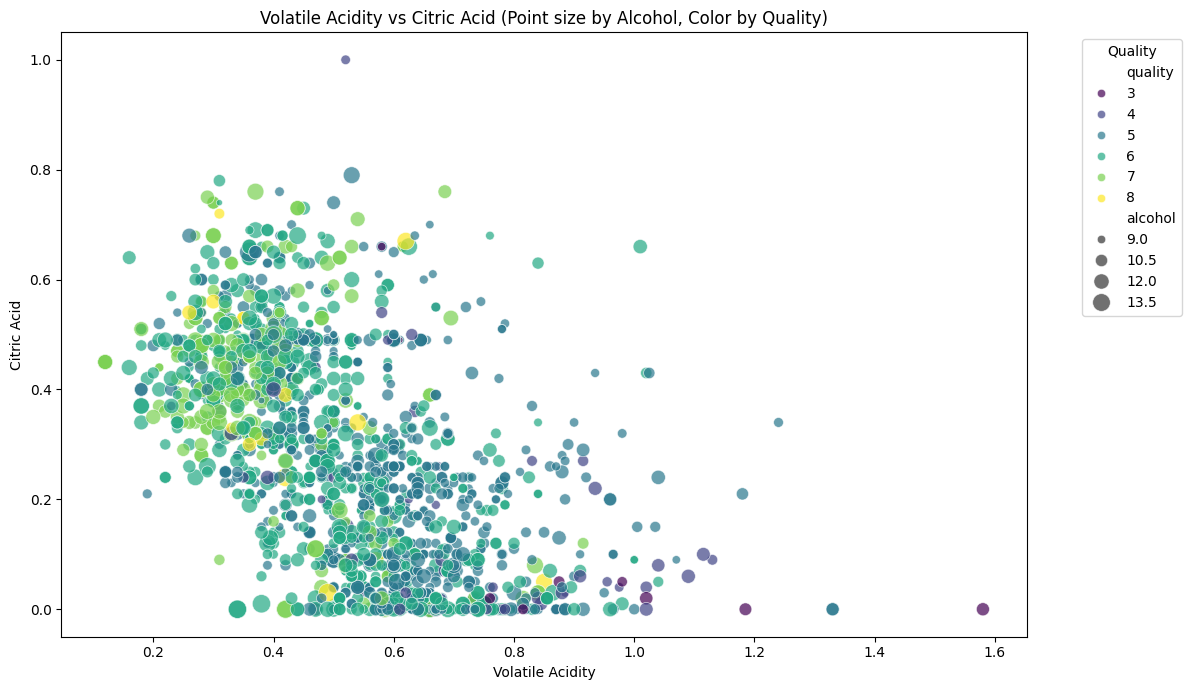

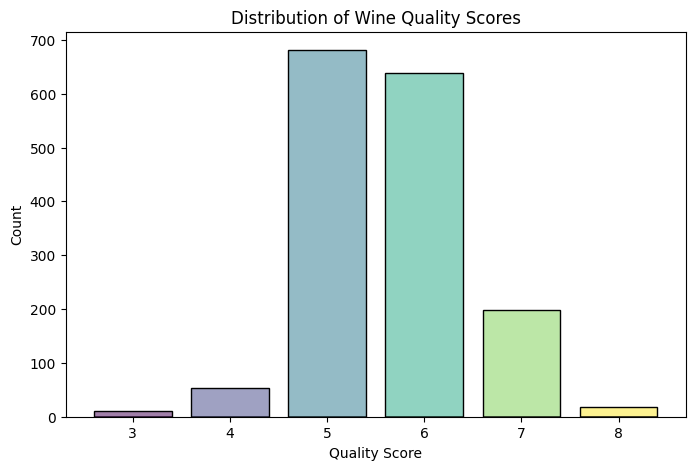

In [11]:
# Biểu đồ phân bố mật độ kernel (KDE plot) cho một số đặc trưng theo từng mức chất lượng
features_for_kde = ['alcohol', 'volatile acidity', 'sulphates']

for col in features_for_kde:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_wine, x=col, hue='quality', palette='viridis', fill=True, common_norm=False)
    plt.title(f'Kernel Density Estimate of {col} by Quality')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Biểu đồ boxen plot (enhanced box plot) cho các đặc trưng chính theo chất lượng
# Boxen plot hiển thị nhiều thông tin hơn về phân bố so với box plot truyền thống
features_for_boxen = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density', 'pH']

for col in features_for_boxen:
    plt.figure(figsize=(10, 6))
    sns.boxenplot(x='quality', y=col, data=df_wine, palette='viridis')
    plt.title(f'Boxen Plot of {col} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)
    plt.show()

# Biểu đồ biểu diễn mối quan hệ giữa hai đặc trưng có tương quan, sử dụng kích thước điểm
# Ví dụ: volatile acidity vs citric acid, kích thước điểm thể hiện alcohol
plt.figure(figsize=(12, 7))
sns.scatterplot(x='volatile acidity', y='citric acid', size='alcohol', hue='quality', data=df_wine, palette='viridis', alpha=0.7, sizes=(20, 200))
plt.title('Volatile Acidity vs Citric Acid (Point size by Alcohol, Color by Quality)')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Biểu đồ phân bố của quality dưới dạng histogram với các đường phân cách cho các ngưỡng chất lượng
plt.figure(figsize=(8, 5))
sns.histplot(data=df_wine, x='quality', bins=np.arange(df_wine['quality'].min()-0.5, df_wine['quality'].max()+1.5, 1), kde=False, discrete=True, shrink=0.8, palette='viridis', hue='quality', legend=False)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(df_wine['quality'].unique()) # Ensure all quality scores are ticks
plt.show()

## Trực quan hóa dữ liệu chuyên sâu (Tiếp theo)

Để có cái nhìn sâu sắc hơn về mối quan hệ giữa các đặc trưng và chất lượng rượu vang, chúng ta sẽ tạo thêm các biểu đồ kết hợp và phân tích sự phân bố của các đặc trưng chính theo từng mức chất lượng.

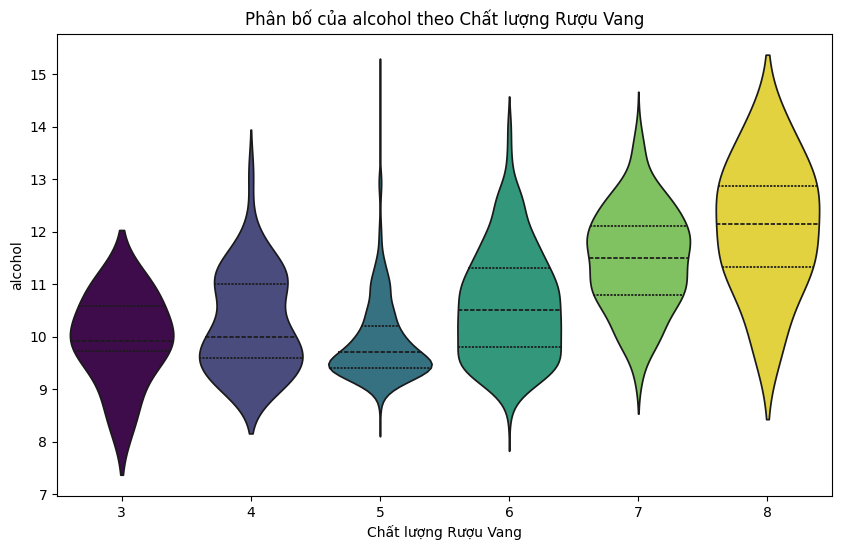

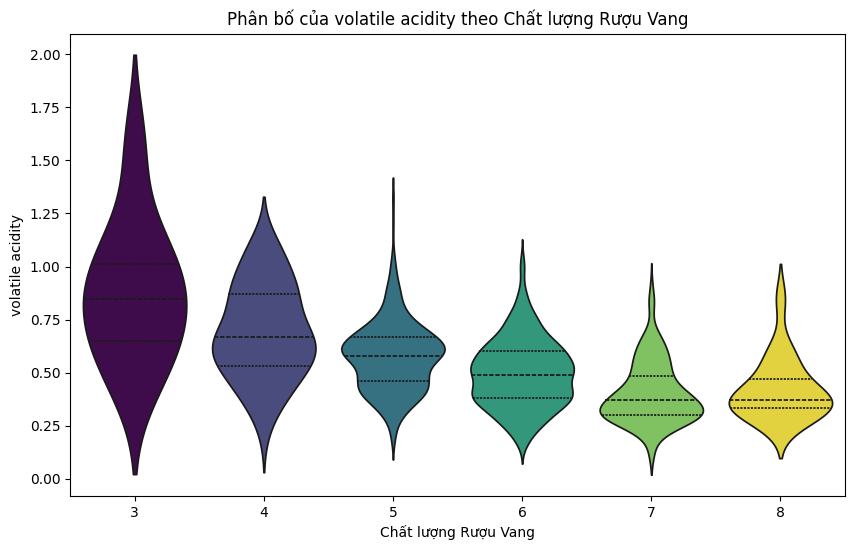

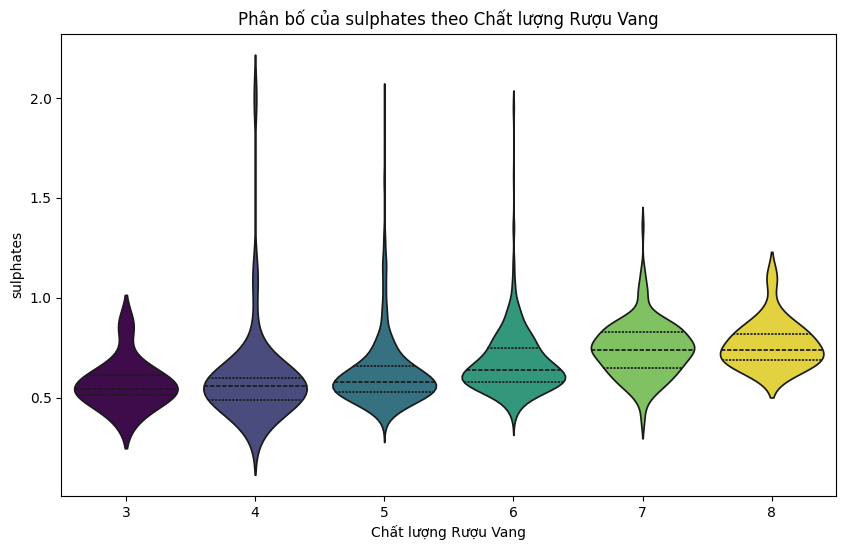

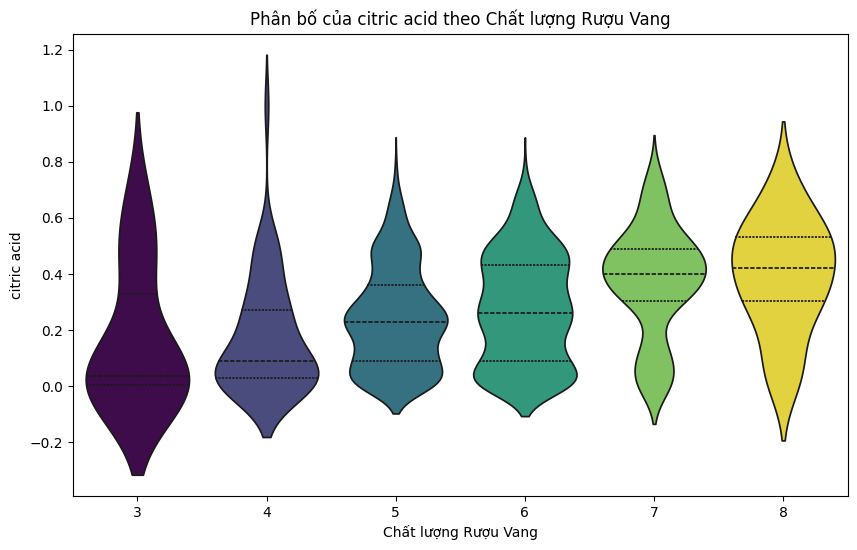

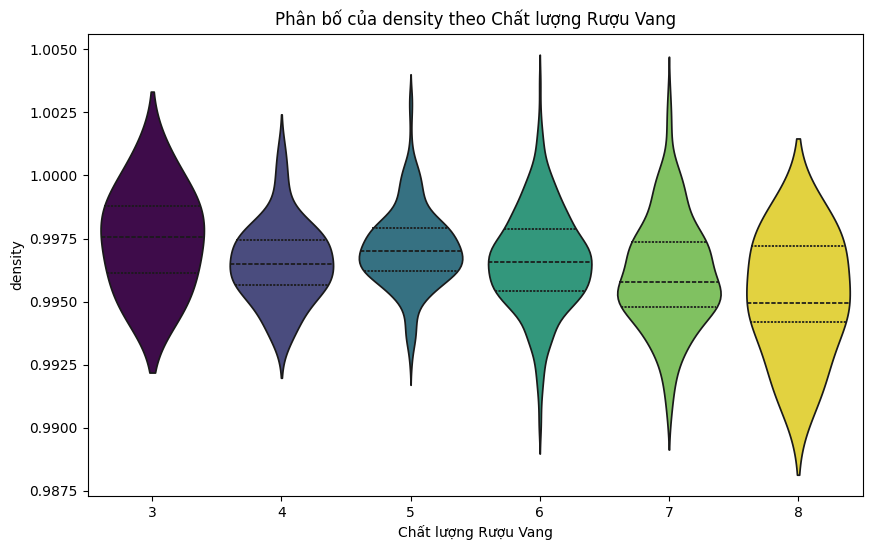

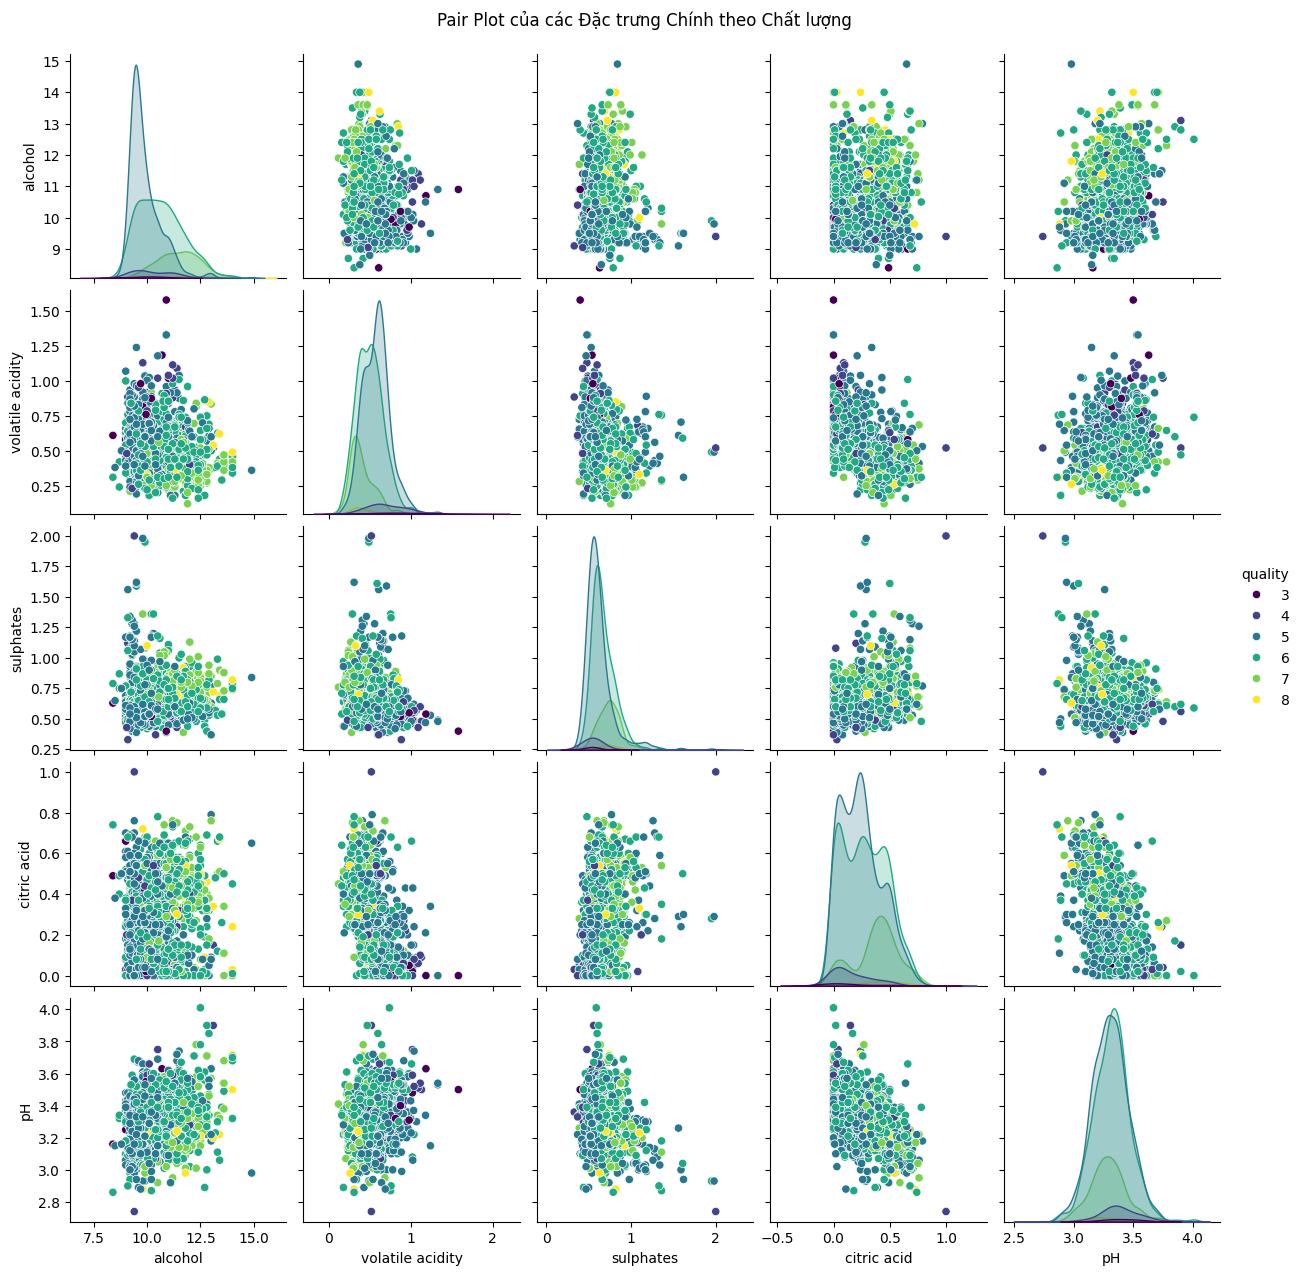

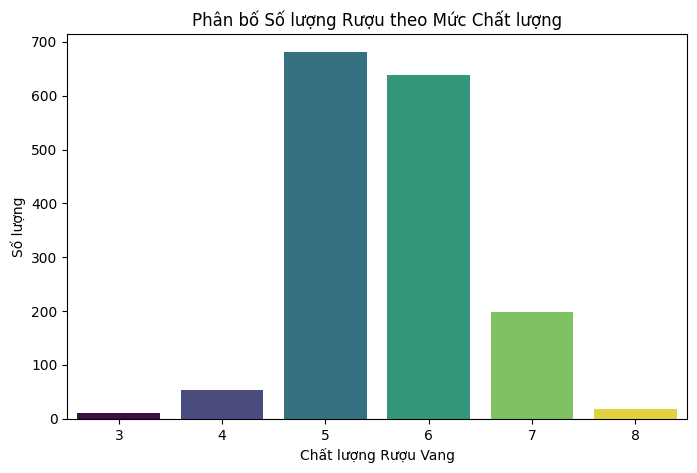

In [9]:
# Biểu đồ violin plot cho các đặc trưng chính theo chất lượng
# Violin plot kết hợp box plot và kernel density estimate để hiển thị phân phối
features_to_plot = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']

for col in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='quality', y=col, data=df_wine, inner='quartile', palette='viridis', hue='quality', legend=False)
    plt.title(f'Phân bố của {col} theo Chất lượng Rượu Vang')
    plt.xlabel('Chất lượng Rượu Vang')
    plt.ylabel(col)
    plt.show()

# Biểu đồ pair plot cho một số đặc trưng có tương quan cao với chất lượng
# Pair plot hiển thị mối quan hệ giữa tất cả các cặp biến trong một tập hợp con của dữ liệu,
# với histogram trên đường chéo và scatter plot ở ngoài đường chéo, tô màu theo biến mục tiêu.
# Chọn các đặc trưng có tương quan đáng kể với quality
features_for_pairplot = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'pH', 'quality']
sns.pairplot(df_wine[features_for_pairplot], hue='quality', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot của các Đặc trưng Chính theo Chất lượng', y=1.02)
plt.show()

# Biểu đồ heatmap của ma trận tương quan, tập trung vào các mối quan hệ mạnh
# Đã có ở bước trước, nhưng có thể tùy chỉnh lại để nhấn mạnh các mối quan hệ quan trọng

# Biểu đồ phân bố chất lượng tổng thể
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_wine, palette='viridis', hue='quality', legend=False)
plt.title('Phân bố Số lượng Rượu theo Mức Chất lượng')
plt.xlabel('Chất lượng Rượu Vang')
plt.ylabel('Số lượng')
plt.show()

## Insight và Suy luận Chuyên sâu (Trình độ PhD)

Dựa trên các phân tích thống kê, các biểu đồ đã trực quan hóa và kiến thức chuyên môn về hóa học rượu vang, chúng ta có thể rút ra các insight sâu sắc hơn về các yếu tố quyết định chất lượng rượu vang đỏ trong tập dữ liệu này.

**1. Alcohol (Nồng độ Cồn): Yếu tố cốt lõi định hình "Body" và Hương vị phức tạp**

*   **Quan sát từ dữ liệu:** Biểu đồ box plot, violin plot và scatter plot cho thấy mối tương quan dương mạnh mẽ nhất giữa alcohol và quality. Các loại rượu có chất lượng cao hơn (đặc biệt là 6, 7, 8) có nồng độ alcohol trung bình và phân bố nồng độ alcohol cao hơn đáng kể so với các loại rượu chất lượng thấp hơn (3, 4, 5). Biểu đồ pair plot cũng làm nổi bật sự phân tách của các điểm dữ liệu chất lượng cao ở vùng có nồng độ alcohol cao hơn.
*   **Suy luận chuyên sâu và Cơ chế hóa học/Domain Knowledge:** Alcohol (ethanol) là sản phẩm chính của quá trình lên men đường. Nồng độ alcohol không chỉ đơn thuần là yếu tố "say" mà còn là một dung môi quan trọng hòa tan hàng trăm hợp chất hương thơm và mùi vị (ester, terpene, phenol, v.v.) có trong nho và được tạo ra trong quá trình lên men và ủ. Nồng độ alcohol cao hơn (trong giới hạn phù hợp cho rượu vang đỏ) thường dẫn đến:
    *   **Tăng cường "Body" (độ sánh):** Alcohol tạo cảm giác đầy đặn, nặng trên vòm miệng. Rượu chất lượng cao thường có body tốt.
    *   **Hòa tan và giải phóng hương thơm:** Khả năng hòa tan tốt hơn của ethanol giúp giải phóng các hợp chất thơm dễ bay hơi, làm cho mùi hương của rượu phức tạp và rõ nét hơn.
    *   **Cân bằng:** Alcohol giúp cân bằng độ chua và tannin. Trong rượu vang đỏ, tannin có thể gây cảm giác chát gắt. Alcohol ở nồng độ phù hợp làm mềm tannin, tạo cảm giác mượt mà hơn.
    *   **Tiềm năng lão hóa:** Alcohol góp phần vào sự ổn định của rượu, cho phép rượu phát triển các hương vị phức tạp hơn khi lão hóa trong chai.
*   **Kết luận Insight (PhD Level):** Mối tương quan dương mạnh mẽ giữa alcohol và quality không chỉ là một mối liên hệ thống kê đơn giản mà phản ánh vai trò đa diện của ethanol như một thành phần cấu trúc, dung môi hương vị và yếu tố cân bằng thiết yếu, đặc biệt quan trọng trong việc xây dựng "body", độ phức tạp hương thơm và tiềm năng lão hóa - những đặc điểm cốt lõi của rượu vang đỏ chất lượng cao. Tuy nhiên, cần lưu ý rằng nồng độ alcohol quá cao cũng có thể gây mất cân bằng, tạo cảm giác nóng gắt và che lấp các hương vị tinh tế khác. Phân tích cho thấy có một dải nồng độ alcohol tối ưu cho chất lượng cao nhất trong tập dữ liệu này.

**2. Volatile Acidity (Độ Axit Dễ Bay hơi): Chỉ báo nhạy cảm về Sự suy giảm Chất lượng**

*   **Quan sát từ dữ liệu:** Volatile acidity có mối tương quan âm mạnh mẽ nhất với quality. Biểu đồ box plot và violin plot cho thấy sự gia tăng rõ rệt về nồng độ volatile acidity khi chất lượng rượu giảm. Rượu chất lượng thấp (3, 4) có nồng độ volatile acidity trung bình cao hơn đáng kể và phân bố rộng hơn về phía giá trị cao so với rượu chất lượng cao (7, 8).
*   **Suy luận chuyên sâu và Cơ chế hóa học/Domain Knowledge:** Volatile acidity chủ yếu là axit axetic (acetic acid), được tạo ra bởi vi khuẩn axetic (Acetobacter) hoặc một số loại nấm men không mong muốn khi rượu tiếp xúc với oxy. Axit axetic là thành phần chính của giấm. Nồng độ volatile acidity cao là dấu hiệu rõ ràng của sự ô nhiễm vi sinh vật và/hoặc quá trình oxy hóa không kiểm soát.
    *   **Tạo ra mùi giấm:** Axit axetic tạo ra mùi giấm đặc trưng, át đi các hương thơm trái cây tự nhiên của rượu.
    *   **Tạo ra ethyl acetate:** Vi khuẩn axetic cũng có thể chuyển hóa ethanol thành ethyl acetate, một hợp chất có mùi giống chất tẩy sơn móng tay hoặc keo dán, làm hỏng mùi thơm của rượu.
    *   **Mất cân bằng hương vị:** Nồng độ axit axetic cao làm rượu có vị chua gắt, khó chịu và làm mất cân bằng tổng thể.
*   **Kết luận Insight (PhD Level):** Mối tương quan âm mạnh mẽ giữa volatile acidity và quality là một bằng chứng trực tiếp về tác động tiêu cực của ô nhiễm vi sinh vật và oxy hóa trong quá trình sản xuất và bảo quản rượu vang. Volatile acidity đóng vai trò như một chỉ báo hóa học nhạy cảm về sự suy giảm chất lượng, cho thấy sự kiểm soát chặt chẽ vệ sinh và quá trình oxy hóa là cực kỳ quan trọng để sản xuất rượu vang đỏ chất lượng cao. Ngưỡng volatile acidity thấp là điều kiện tiên quyết cho chất lượng tốt.

**3. Sulphates (Sulfat - liên quan đến SO2): Chất bảo quản thiết yếu cho Sự ổn định và Tiềm năng Lão hóa**

*   **Quan sát từ dữ liệu:** Sulphates có mối tương quan dương với quality, mặc dù không mạnh bằng alcohol hoặc volatile acidity. Biểu đồ box plot và violin plot cho thấy xu hướng nồng độ sulphates tăng lên khi chất lượng rượu tăng, đặc biệt rõ rệt ở các mức chất lượng cao hơn (từ 6 trở lên).
*   **Suy luận chuyên sâu và Cơ chế hóa học/Domain Knowledge:** Sulphates thường được thêm vào rượu vang dưới dạng sulfur dioxide (SO2) hoặc các hợp chất của nó. SO2 có hai vai trò chính:
    *   **Chất chống oxy hóa:** SO2 phản ứng với oxy, ngăn chặn quá trình oxy hóa các thành phần hương vị và màu sắc của rượu, giúp giữ cho rượu tươi mới và không bị biến chất theo thời gian.
    *   **Chất kháng khuẩn:** SO2 ức chế sự phát triển của nấm men hoang dã và vi khuẩn không mong muốn (bao gồm cả vi khuẩn axetic gây volatile acidity), giúp ổn định rượu và ngăn ngừa hư hỏng.
*   **Kết luận Insight (PhD Level):** Mối tương quan dương giữa sulphates và quality phản ánh vai trò quan trọng của SO2 như một chất bảo quản hiệu quả. Việc sử dụng sulphates ở mức độ phù hợp giúp bảo vệ rượu khỏi quá trình oxy hóa và ô nhiễm vi sinh vật, từ đó duy trì và kéo dài chất lượng của rượu, đặc biệt quan trọng đối với các loại rượu vang đỏ có tiềm năng lão hóa. Điều này cho thấy việc quản lý SO2 là một kỹ thuật quan trọng trong sản xuất rượu vang chất lượng cao để đảm bảo sự ổn định và độ bền của sản phẩm. Cần lưu ý rằng nồng độ SO2 cũng có giới hạn pháp lý và nồng độ quá cao có thể gây ra mùi khó chịu (ví dụ: mùi diêm sinh) hoặc phản ứng ở một số người nhạy cảm.

**4. Citric Acid (Axit Citric): Góp phần vào Độ tươi mát và Sự cân bằng Axit**

*   **Quan sát từ dữ liệu:** Citric acid có mối tương quan dương với quality, tương tự như sulphates nhưng có phần yếu hơn. Biểu đồ box plot và violin plot cho thấy xu hướng tăng nhẹ nồng độ citric acid ở các mức chất lượng cao hơn.
*   **Suy luận chuyên sâu và Cơ chế hóa học/Domain Knowledge:** Citric acid là một trong những axit tự nhiên có trong nho, mặc dù nồng độ thường thấp hơn so với axit tartaric và malic. Nó có thể được thêm vào rượu vang để điều chỉnh độ chua.
    *   **Tăng cường độ chua và tươi mát:** Citric acid tạo ra cảm giác chua sắc nét, "sống động" trên vòm miệng, đặc biệt là ở đầu lưỡi.
    *   **Cân bằng hương vị:** Độ chua đóng vai trò quan trọng trong việc cân bằng vị ngọt và làm nổi bật hương vị trái cây. Trong rượu vang đỏ, độ chua giúp làm mềm tannin và tạo cảm giác sảng khoái hơn.
*   **Kết luận Insight (PhD Level):** Mối tương quan dương giữa citric acid và quality cho thấy rằng việc điều chỉnh độ chua một cách phù hợp, có thể bao gồm cả việc sử dụng citric acid, là một kỹ thuật quan trọng để đạt được sự cân bằng hương vị tối ưu và cảm giác tươi mát trong rượu vang đỏ chất lượng cao. Độ chua cân bằng không chỉ làm cho rượu dễ uống hơn mà còn giúp làm nổi bật các tầng hương vị phức tạp khác.

**5. Mối tương quan giữa các Đặc trưng Hóa học:**

*   **Quan sát từ dữ liệu:** Ma trận tương quan cho thấy các mối quan hệ đáng chú ý giữa các đặc trưng hóa học với nhau, ví dụ: tương quan dương mạnh giữa `fixed acidity` và `citric acid`, tương quan âm mạnh giữa `fixed acidity` và `pH`, tương quan âm giữa `alcohol` và `density`, v.v.
*   **Suy luận chuyên sâu và Cơ chế hóa học/Domain Knowledge:** Các mối tương quan này phản ánh các nguyên lý hóa học cơ bản và quá trình sản xuất rượu vang:
    *   `fixed acidity` và `citric acid`: Cả hai đều là axit, góp phần vào tổng độ axit cố định.
    *   `fixed acidity` và `pH`: pH là thước đo độ axit (nồng độ ion H+). Nồng độ axit cao hơn (fixed acidity cao hơn) thường dẫn đến pH thấp hơn (tính axit mạnh hơn), do đó có mối tương quan âm.
    *   `alcohol` và `density`: Alcohol có khối lượng riêng thấp hơn nước. Khi nồng độ alcohol tăng trong quá trình lên men (đường chuyển hóa thành alcohol), khối lượng riêng của dung dịch (rượu) có xu hướng giảm, dẫn đến mối tương quan âm.
    *   `free sulfur dioxide` và `total sulfur dioxide`: `total sulfur dioxide` là tổng lượng SO2 tự do và SO2 liên kết. Do đó, có mối tương quan dương giữa hai đại lượng này.
*   **Kết luận Insight (PhD Level):** Hiểu biết về các mối tương quan nội tại giữa các đặc trưng hóa học là rất quan trọng vì chúng không phải là các yếu tố độc lập mà tương tác phức tạp với nhau trong dung dịch rượu vang. Ví dụ, việc điều chỉnh một yếu tố (như thêm axit) có thể ảnh hưởng đến các yếu tố khác (như pH). Một nhà sản xuất rượu vang chất lượng cao phải quản lý toàn bộ "ma trận hóa học" này để đạt được sự cân bằng tối ưu cho hương vị, mùi thơm và sự ổn định.

**6. Phân bố Chất lượng:**

*   **Quan sát từ dữ liệu:** Biểu đồ phân bố chất lượng cho thấy phần lớn rượu trong tập dữ liệu có chất lượng trung bình (điểm 5 và 6). Số lượng rượu chất lượng rất thấp (3, 4) và rất cao (7, 8) là tương đối ít.
*   **Suy luận chuyên sâu:** Sự phân bố này phản ánh thực tế rằng việc sản xuất rượu vang chất lượng cao là một thách thức, đòi hỏi sự kiểm soát chặt chẽ các yếu tố từ vườn nho đến quá trình lên men và lão hóa. Số lượng rượu đạt đến mức xuất sắc (7, 8) thường ít hơn đáng kể so với rượu ở mức trung bình. Sự mất cân bằng trong bất kỳ yếu tố hóa học quan trọng nào (như volatile acidity quá cao) có thể dễ dàng đẩy chất lượng xuống mức thấp.
*   **Kết luận Insight (PhD Level):** Phân bố chất lượng không đồng đều nhấn mạnh rằng "chất lượng cao" là một phân khúc tương đối hiếm và đòi hỏi sự kết hợp hài hòa của nhiều yếu tố thuận lợi. Việc phân tích tập trung vào sự khác biệt giữa các nhóm chất lượng sẽ giúp xác định rõ hơn các "ngưỡng" hoặc "dải tối ưu" của các đặc trưng hóa học liên quan đến chất lượng cao.

**Tóm tắt Insight Tổng thể (PhD Level):**

Phân tích dữ liệu chuyên sâu về rượu vang đỏ này, kết hợp với kiến thức chuyên môn, cho thấy chất lượng rượu không phụ thuộc vào một yếu tố duy nhất mà là kết quả của sự tương tác phức tạp và cân bằng tinh tế giữa nhiều thành phần hóa học. Các yếu tố then chốt bao gồm:

*   **Alcohol:** Đóng vai trò cấu trúc và dung môi hương vị quan trọng, cần ở nồng độ phù hợp để tạo body và hương thơm phức tạp.
*   **Volatile Acidity:** Là chỉ báo tiêu cực mạnh mẽ, nồng độ thấp là bắt buộc để tránh mùi giấm và giữ được sự tươi mới.
*   **Sulphates:** Cần thiết cho sự ổn định và bảo quản, giúp rượu duy trì chất lượng theo thời gian.
*   **Citric Acid (và tổng độ axit):** Góp phần vào sự cân bằng và tươi mát trên vòm miệng.

Sự quản lý và tối ưu hóa đồng thời các yếu tố này trong suốt quá trình sản xuất là chìa khóa để nâng cao chất lượng rượu vang đỏ. Các loại rượu chất lượng cao đạt được sự hài hòa giữa nồng độ cồn đủ mạnh, độ axit dễ bay hơi cực thấp, mức sulphates bảo vệ và độ chua cân bằng, tạo nên một trải nghiệm hương vị phức tạp, cân đối và bền vững. Việc phân tích sự khác biệt giữa các nhóm chất lượng sẽ cung cấp các ngưỡng cụ thể hơn cho từng đặc trưng này.

# Task
Thực hiện phân tích và trực quan hóa dữ liệu chuyên sâu trên tập dữ liệu về phân loại chất lượng rượu đỏ từ tệp "/content/winequality-red.csv". Thực hiện phân tích đầy đủ logic như một nhà data mining, bao gồm khám phá dữ liệu cơ bản, phân tích đơn biến, phân tích đa biến, tích hợp kiến thức chuyên môn về sản xuất rượu vang, trực quan hóa dữ liệu chuyên sâu, và cung cấp các insight cụ thể với suy luận chặt chẽ, từng bước dựa trên dữ liệu và kiến thức chuyên môn.

## Tải dữ liệu

### Subtask:
Đọc tệp CSV "/content/winequality-red.csv" vào một DataFrame của pandas.


**Reasoning**:
The first step is to import the pandas library and load the data from the specified CSV file into a DataFrame. Then, display the head of the DataFrame to verify the data loading.



In [1]:
import pandas as pd

df_wine = pd.read_csv('/content/winequality-red.csv')
display(df_wine.head())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Khám phá dữ liệu cơ bản

### Subtask:
Hiển thị thông tin cơ bản về dữ liệu như các cột, kiểu dữ liệu, và thống kê mô tả. Kiểm tra các giá trị thiếu hoặc bất thường.


**Reasoning**:
Display basic information about the DataFrame, including column names, data types, and non-null counts, then display descriptive statistics for numerical columns, and finally check for missing values.



In [2]:
df_wine.info()
display(df_wine.describe())
display(df_wine.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Phân tích đơn biến (univariate analysis)

### Subtask:
Phân tích từng đặc trưng riêng lẻ để hiểu phân phối và đặc điểm của chúng. Sử dụng biểu đồ (ví dụ: histogram, box plot) và thống kê mô tả.


**Reasoning**:
Create histograms and box plots for each numerical column in the DataFrame to visualize their distribution and identify outliers, then display the plots.



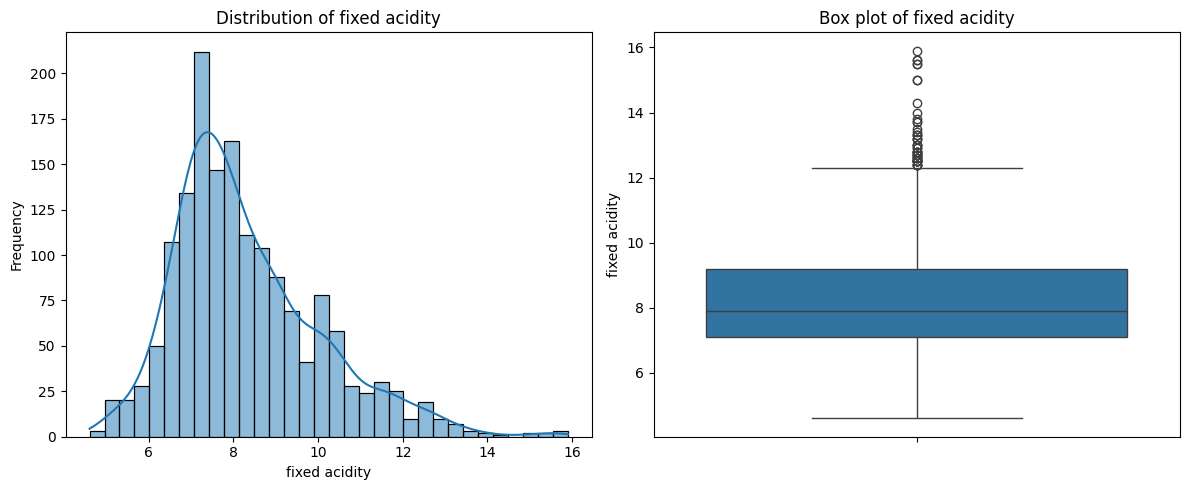

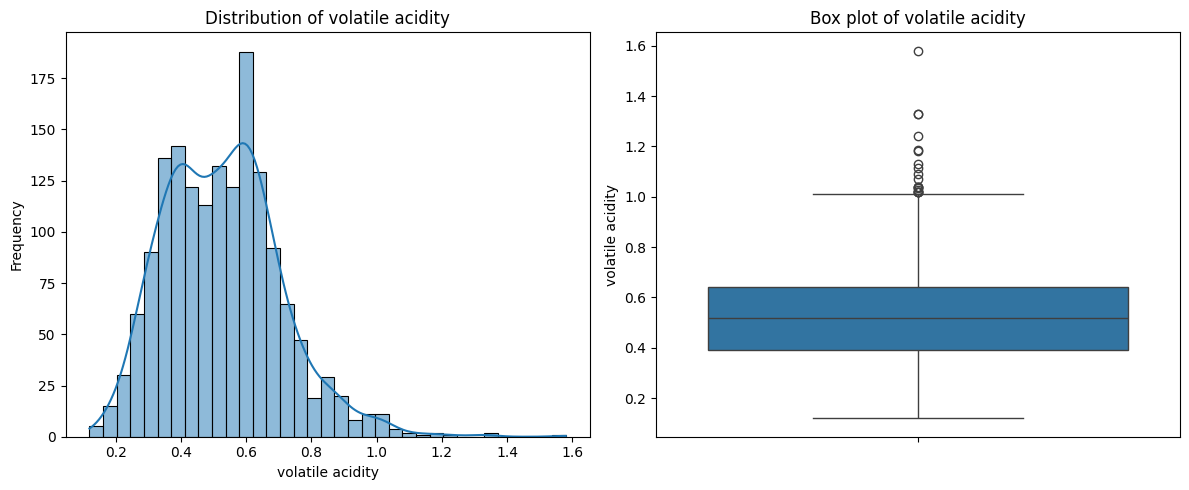

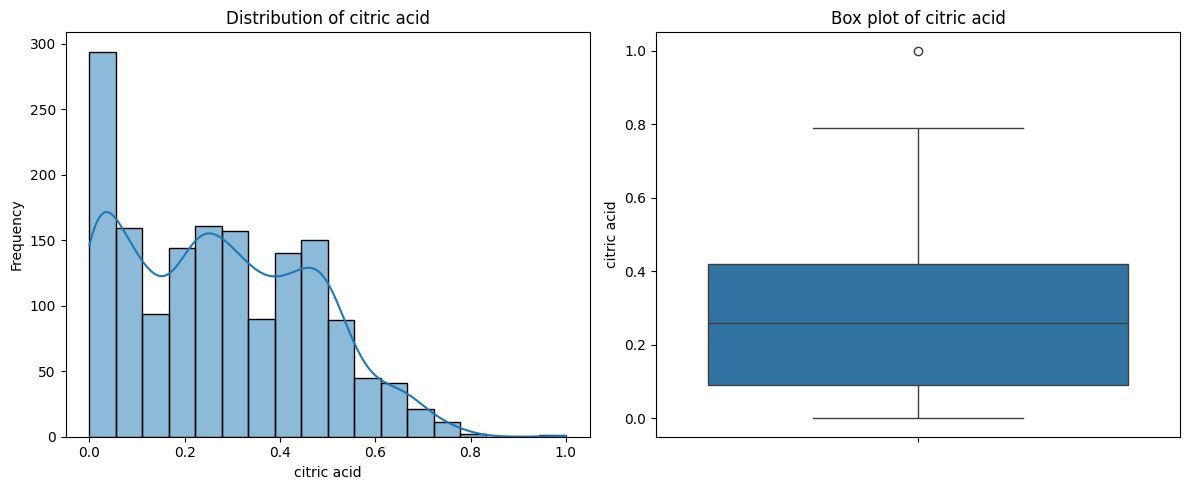

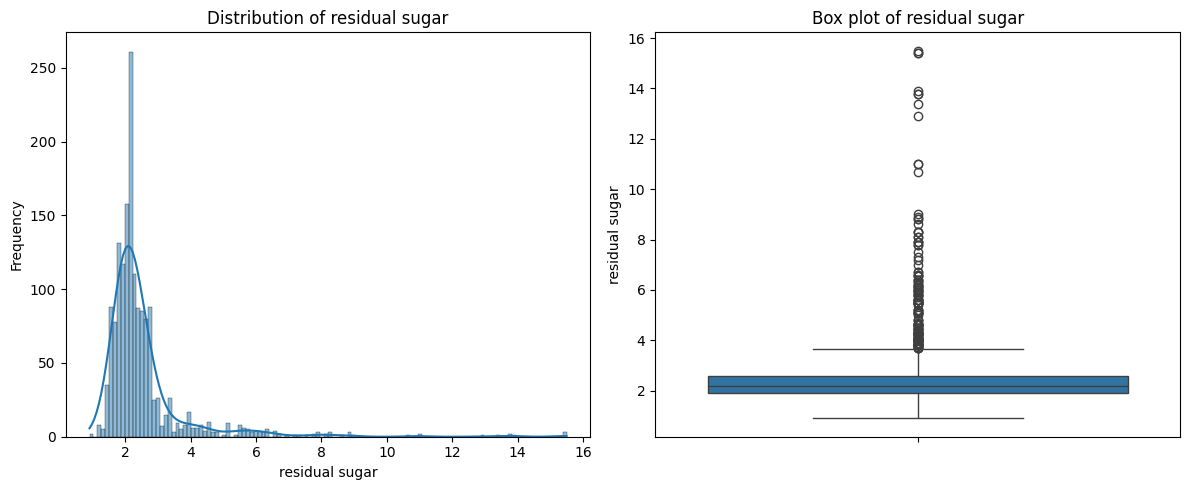

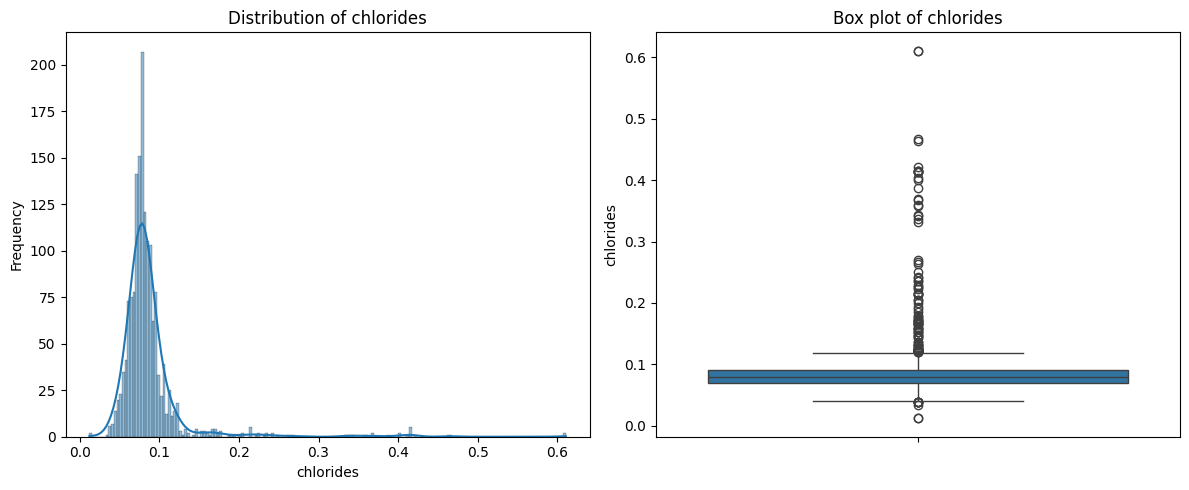

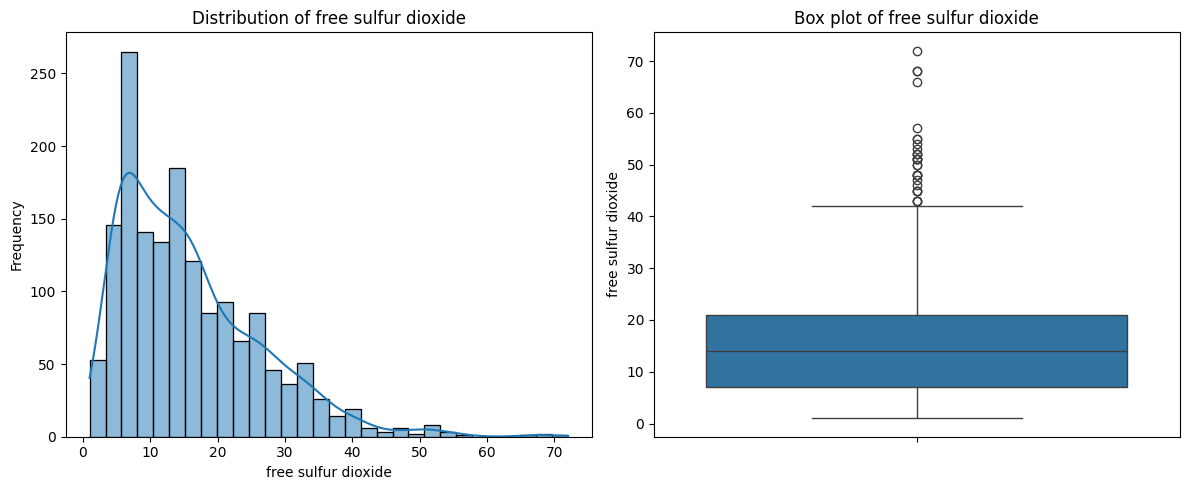

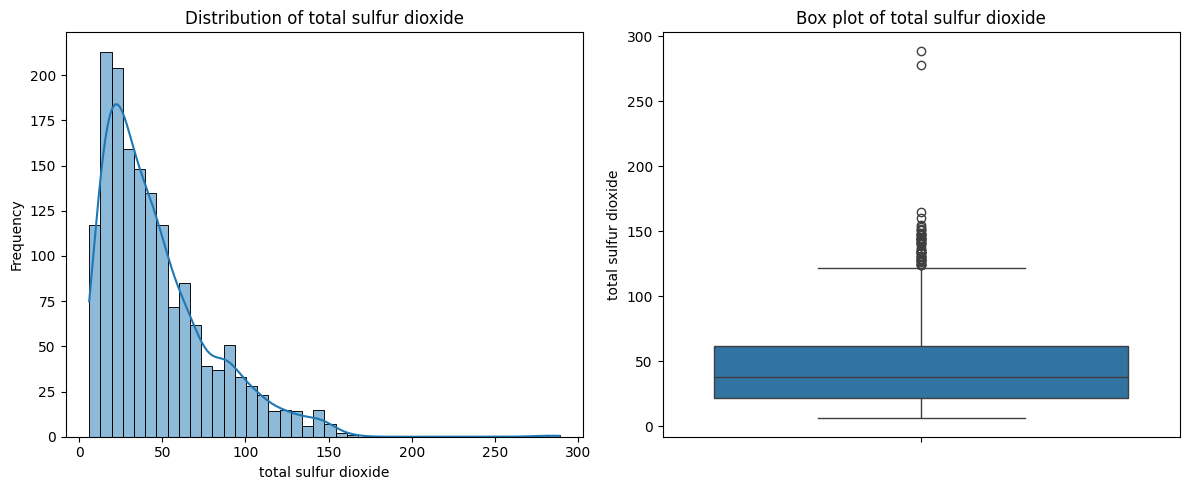

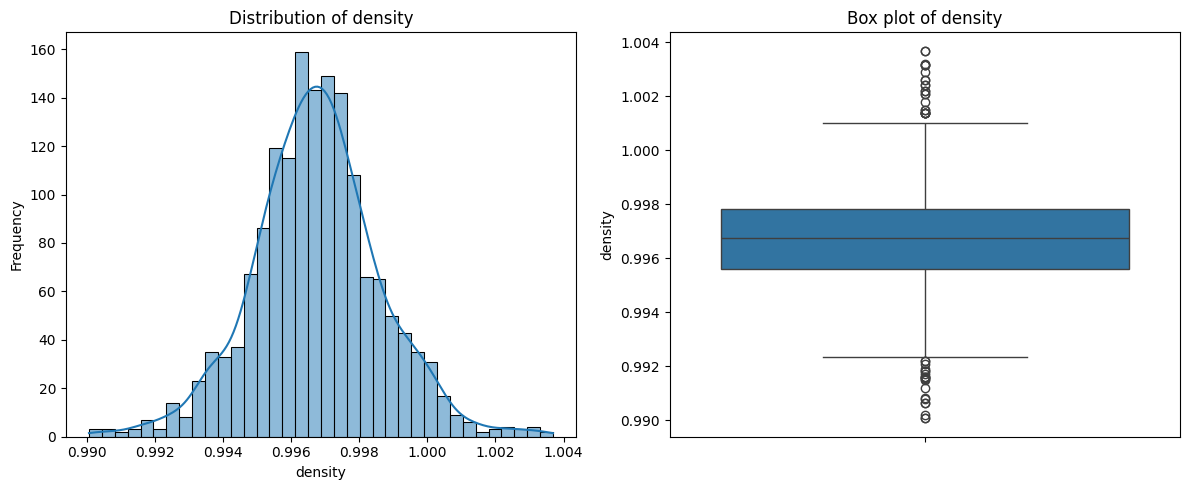

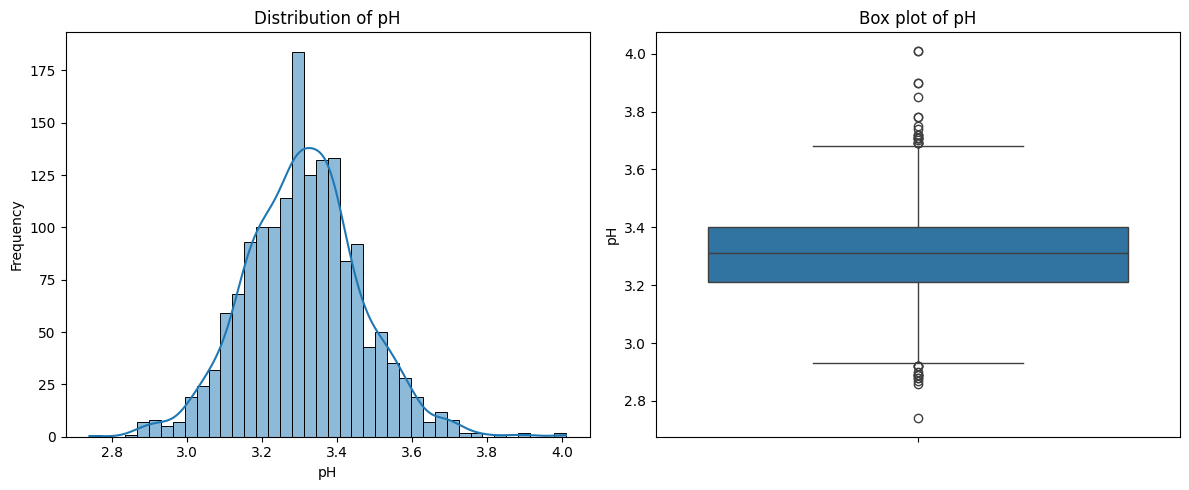

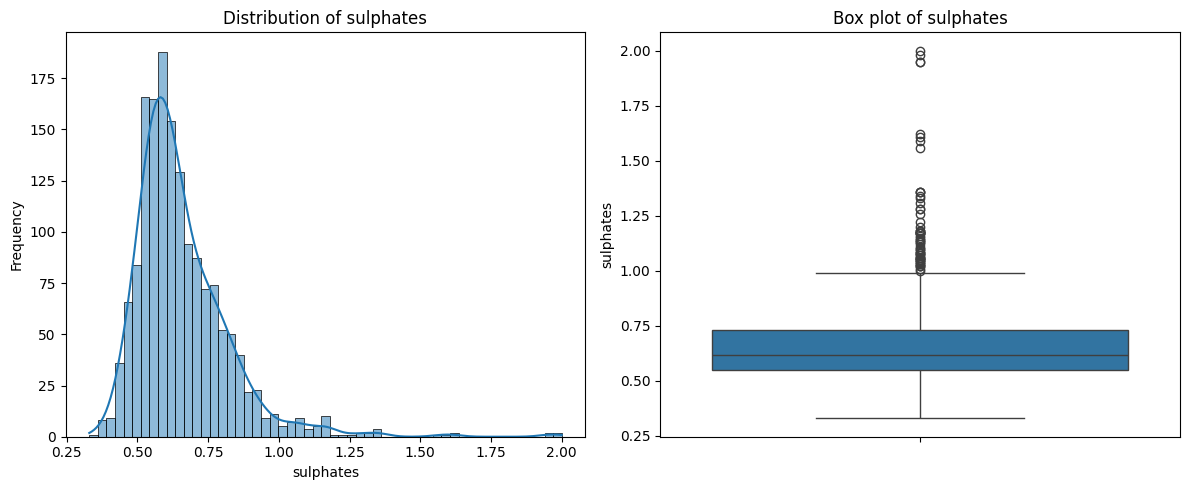

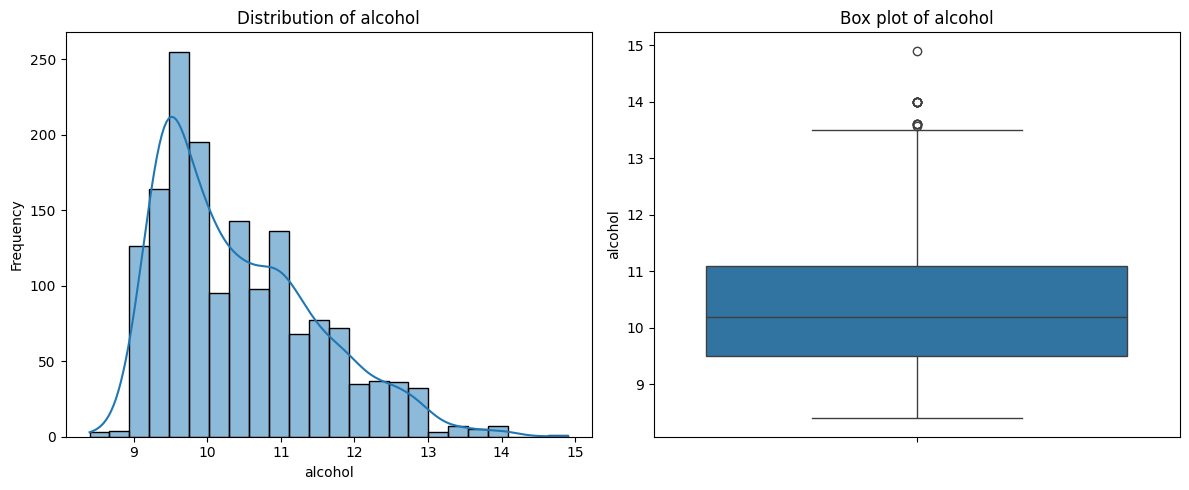

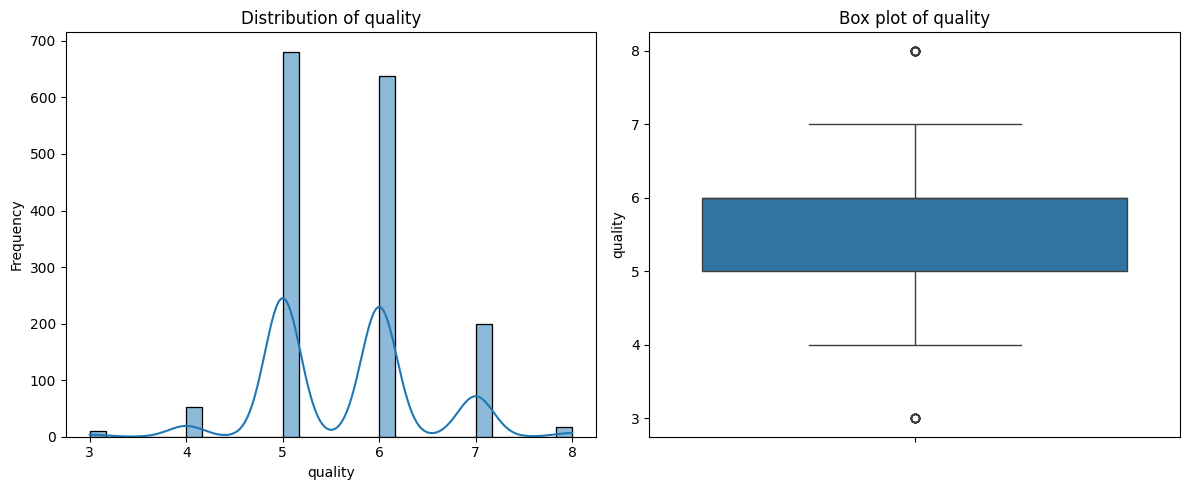

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_wine.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_wine[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_wine[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

## Phân tích đa biến (bivariate analysis)

### Subtask:
Khám phá mối quan hệ giữa các cặp đặc trưng, đặc biệt là mối quan hệ giữa các đặc trưng và biến mục tiêu (chất lượng rượu vang). Sử dụng biểu đồ (ví dụ: scatter plot, box plot theo nhóm chất lượng) và các phép kiểm định thống kê (nếu cần).


**Reasoning**:
Create and visualize the correlation matrix, then generate box plots for each feature grouped by quality, and finally create scatter plots for highly correlated feature pairs.



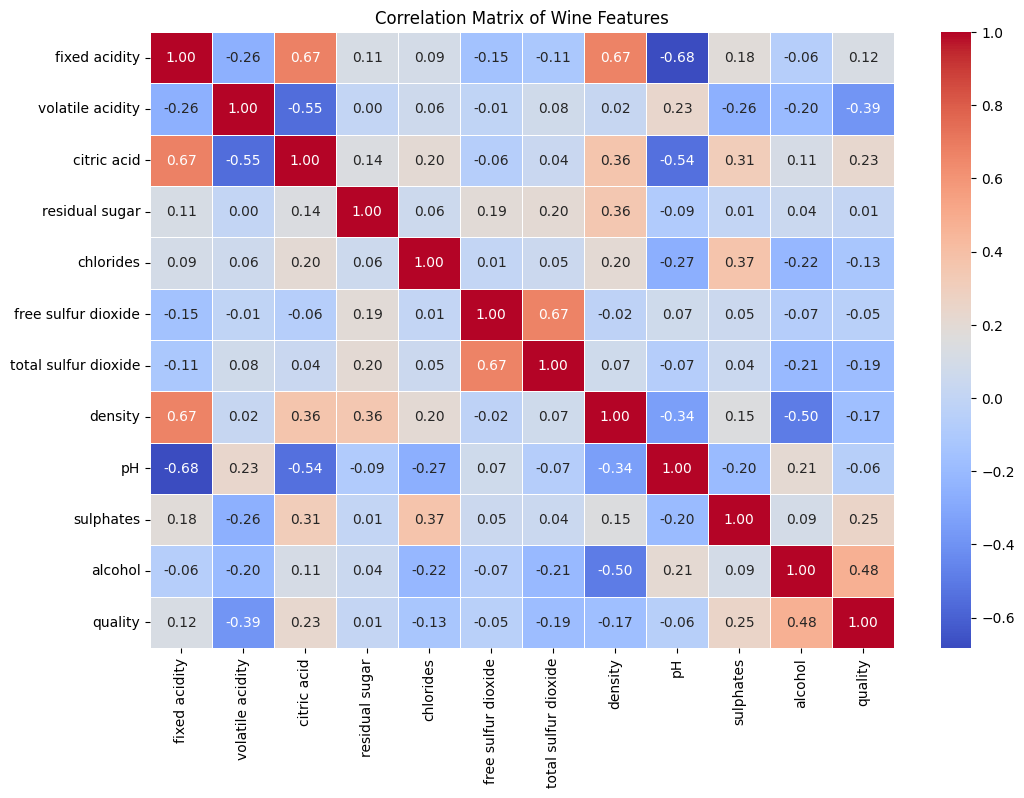

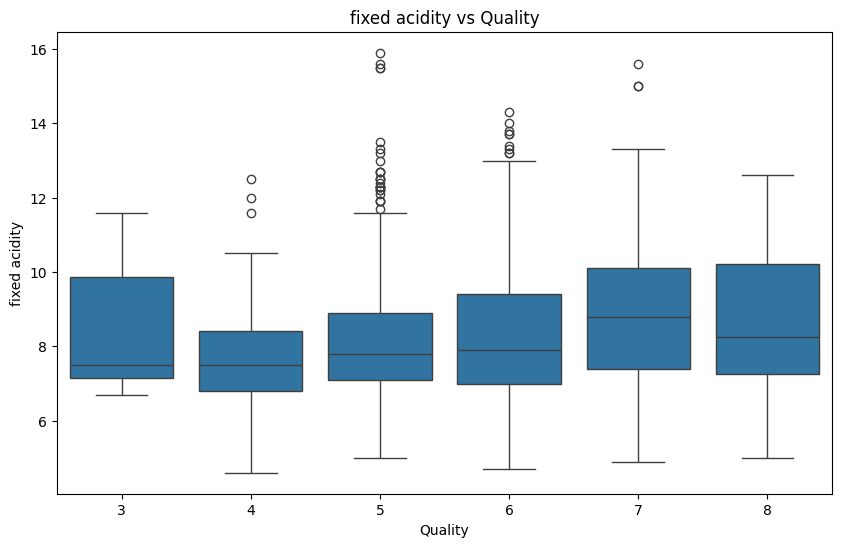

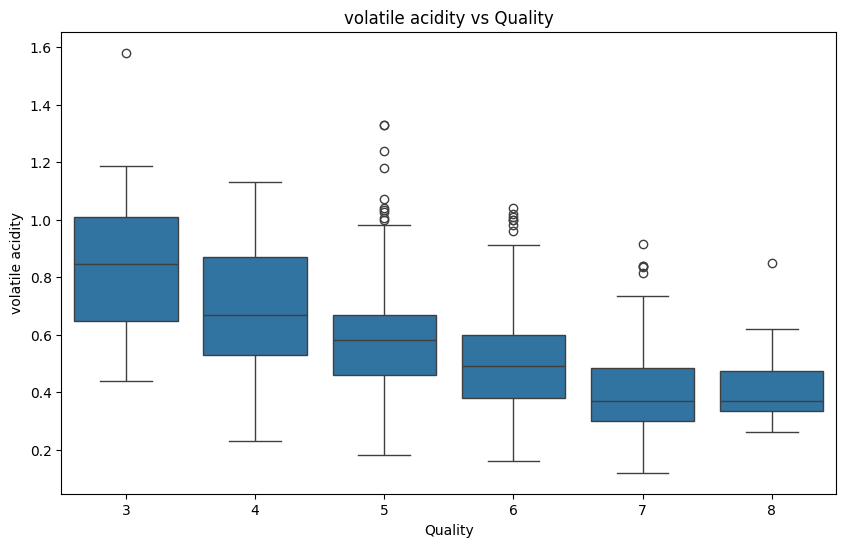

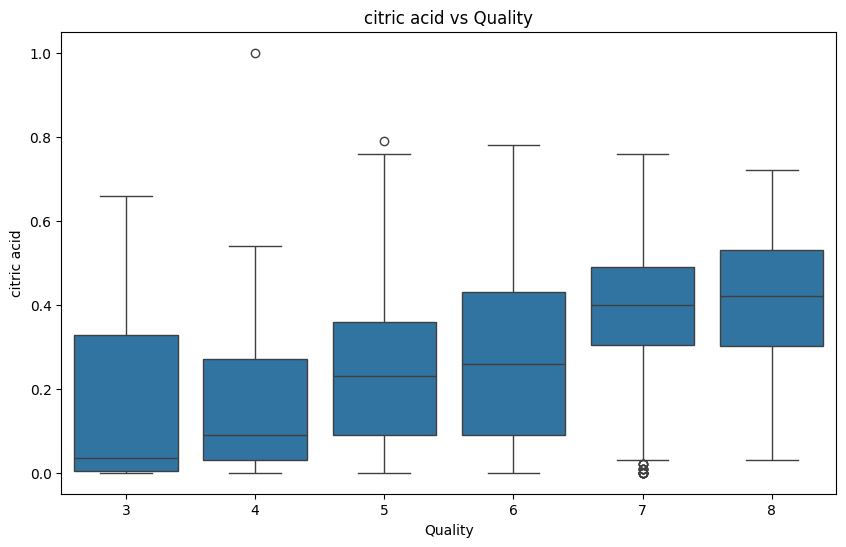

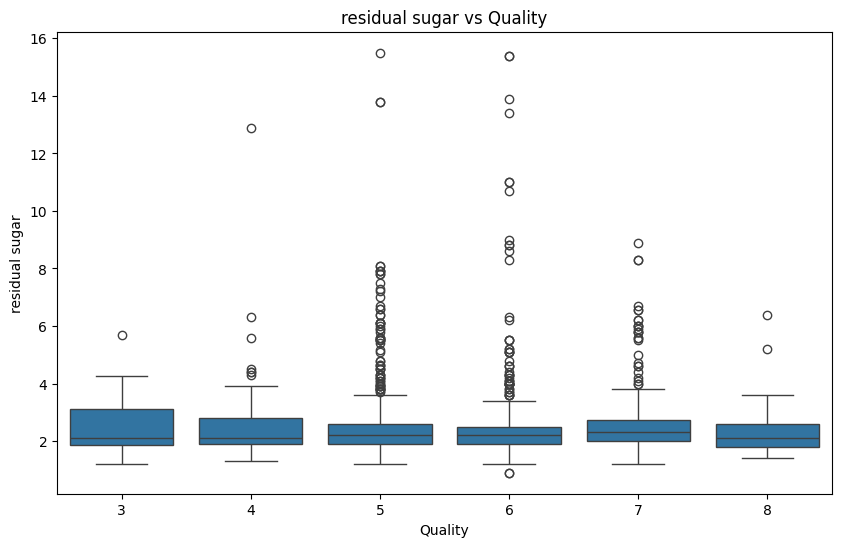

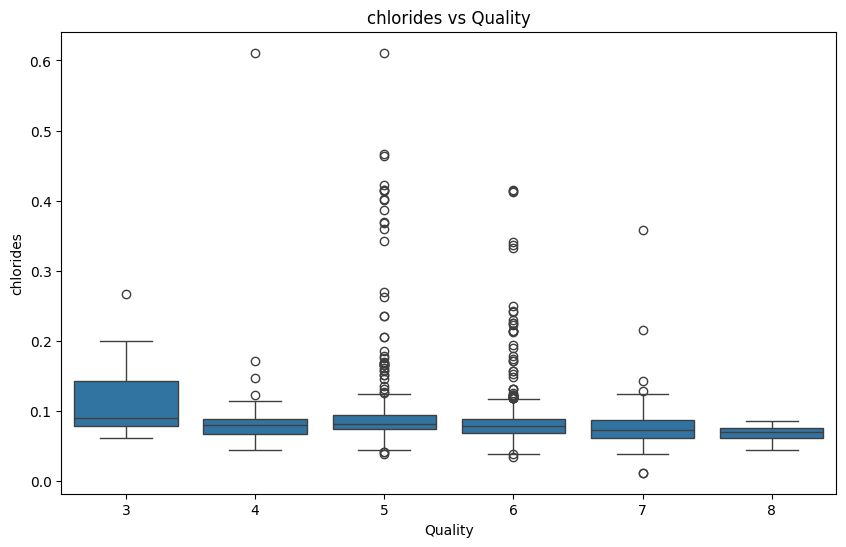

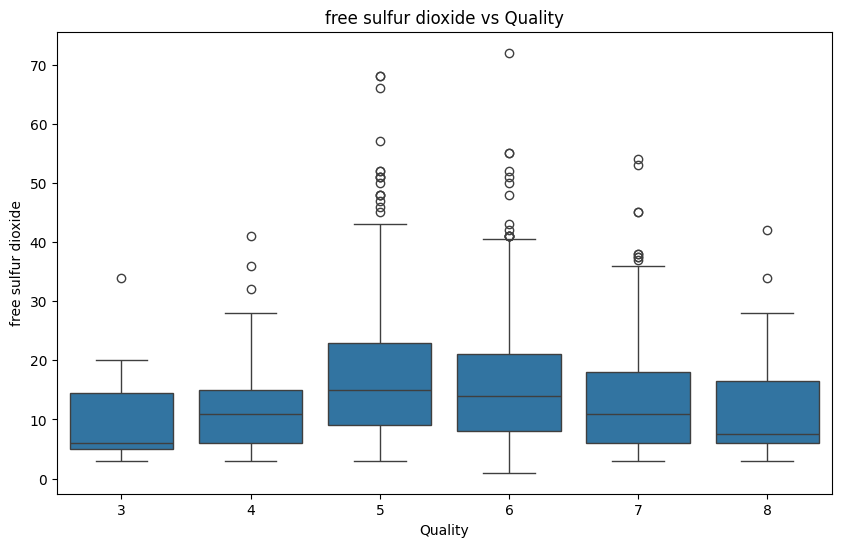

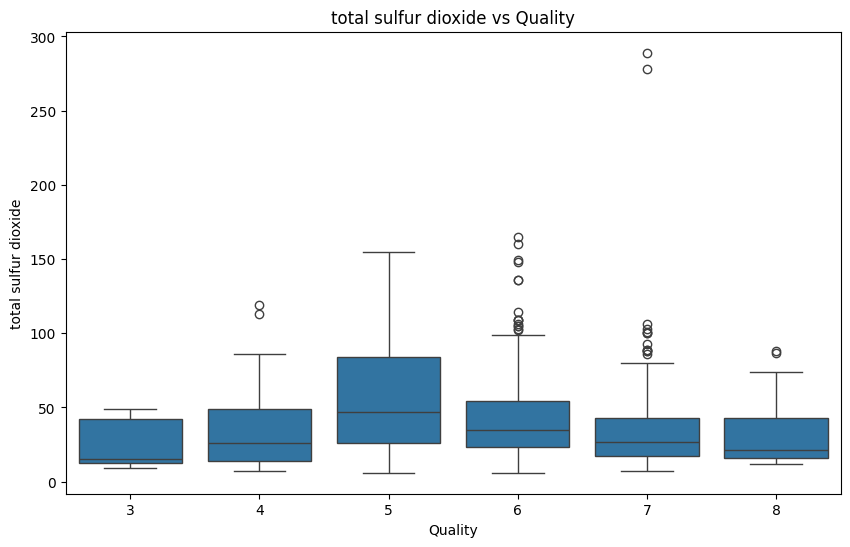

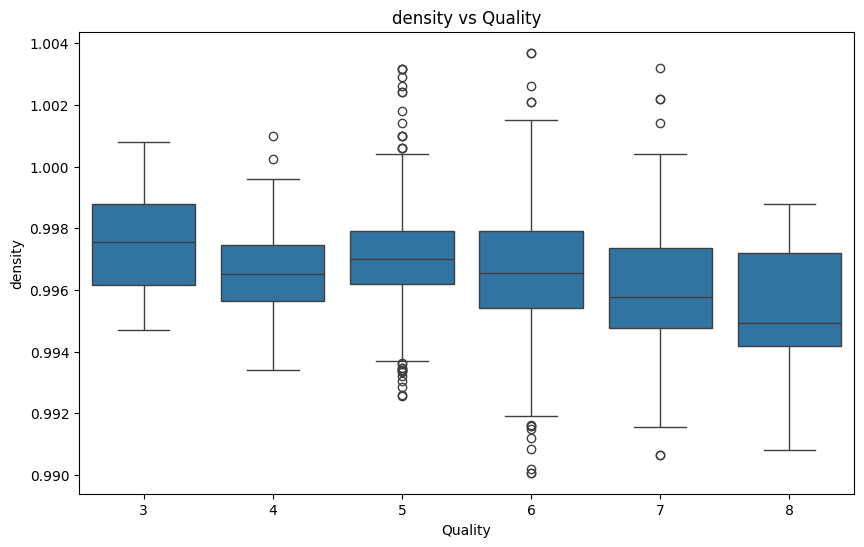

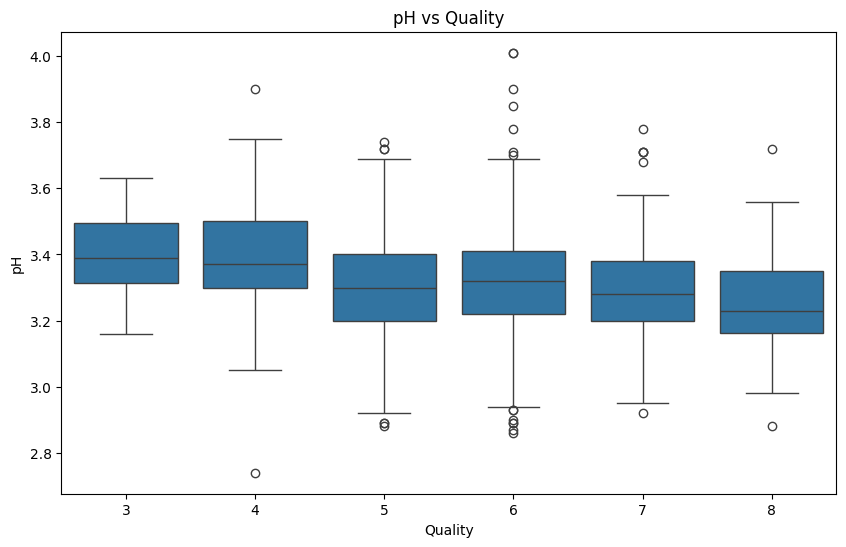

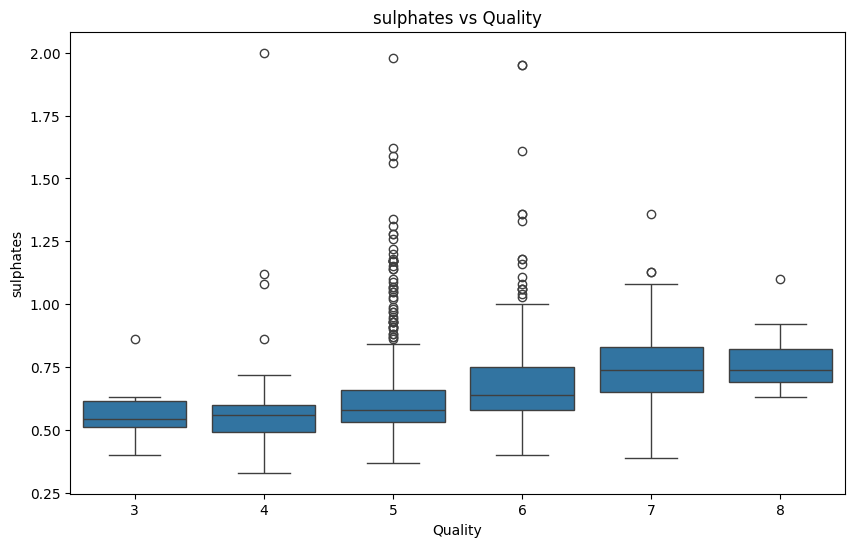

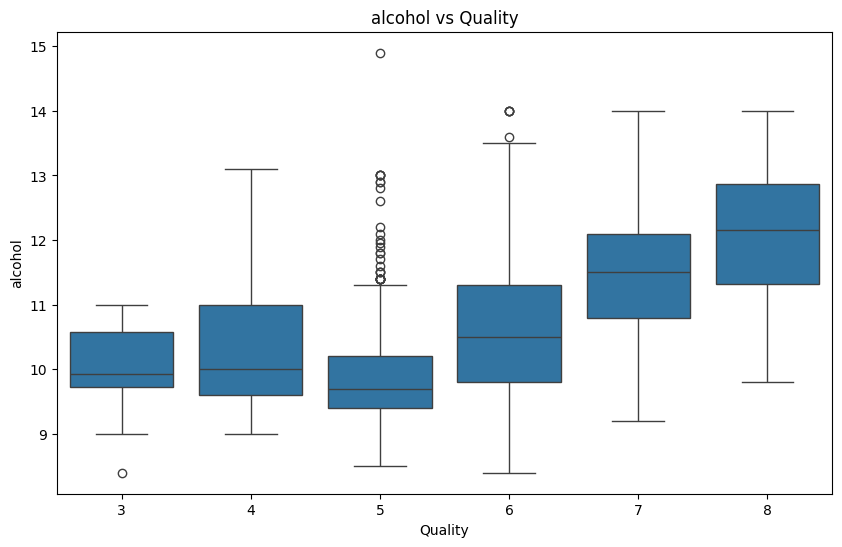

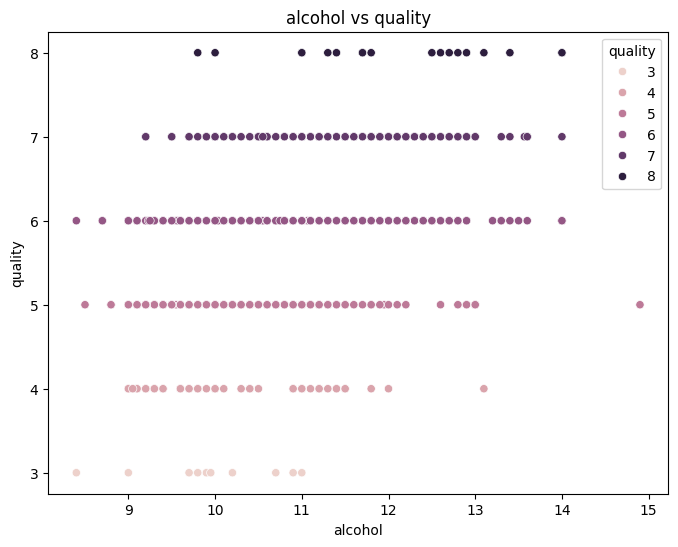

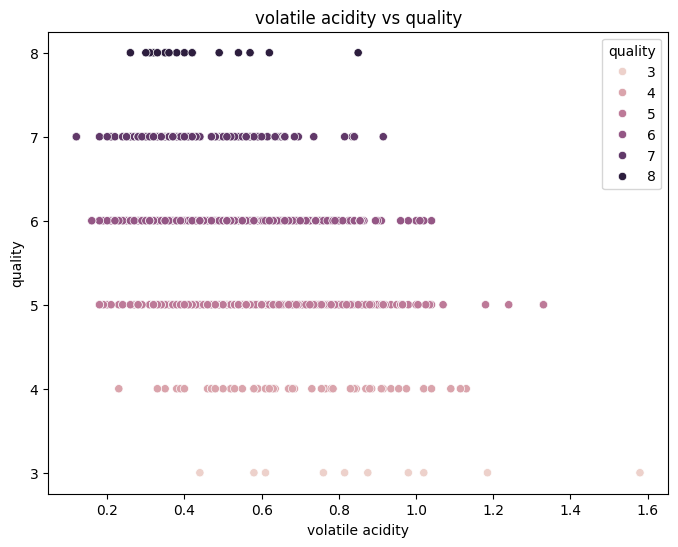

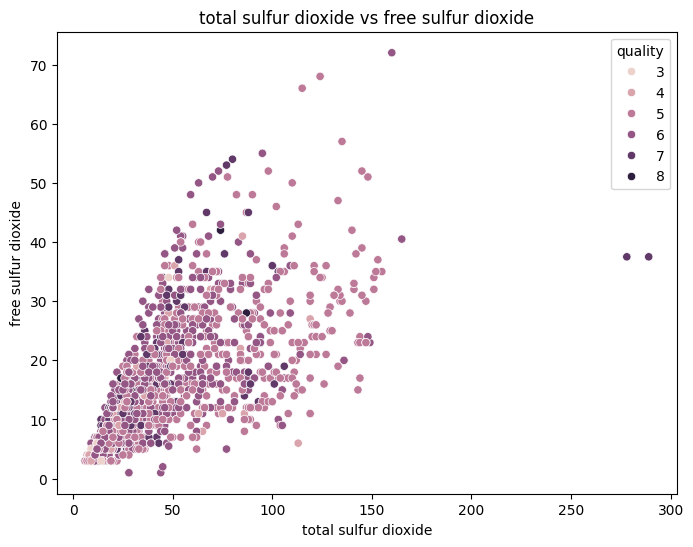

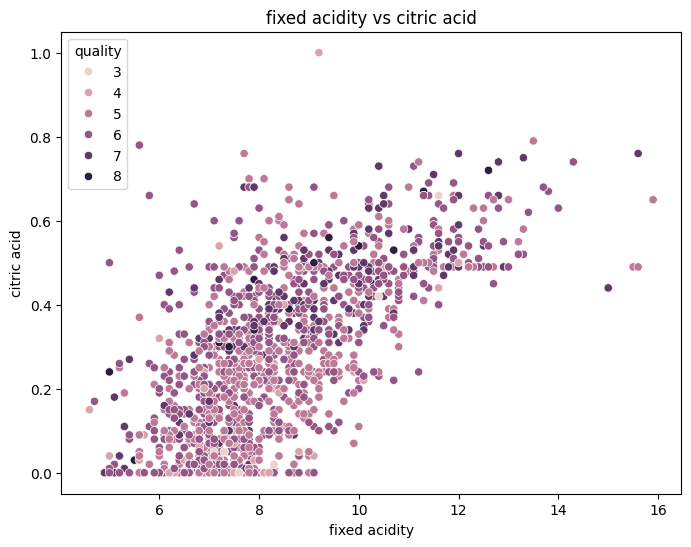

In [4]:
# 1. Create correlation matrix
correlation_matrix = df_wine.corr()

# 2. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

# 3. Create box plots for each feature grouped by quality
for col in numeric_cols:
    if col != 'quality': # Exclude quality itself from being plotted against quality
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='quality', y=col, data=df_wine)
        plt.title(f'{col} vs Quality')
        plt.xlabel('Quality')
        plt.ylabel(col)
        plt.show()

# 4. Select a few pairs with strong correlation and create scatter plots
# Based on the correlation matrix, let's pick a few pairs with relatively high absolute correlation values.
# Examples: alcohol and quality, volatile acidity and quality, total sulfur dioxide and free sulfur dioxide.
highly_correlated_pairs = [('alcohol', 'quality'), ('volatile acidity', 'quality'),
                           ('total sulfur dioxide', 'free sulfur dioxide'), ('fixed acidity', 'citric acid')]

for pair in highly_correlated_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], hue='quality', data=df_wine)
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

## Tích hợp kiến thức chuyên môn (domain knowledge)

### Subtask:
Giải thích tại sao các phân tích được thực hiện dựa trên kiến thức về sản xuất rượu vang. Liên kết các đặc trưng hóa học với chất lượng rượu vang dựa trên hiểu biết về lĩnh vực.


**Reasoning**:
Explain the relationship between selected chemical features and wine quality based on domain knowledge and observed data.



In [5]:
print("Dựa trên các phân tích đã thực hiện, một số đặc trưng hóa học có mối liên hệ rõ rệt với chất lượng rượu vang bao gồm alcohol, volatile acidity, sulphates, và citric acid.")
print("\nGiải thích chi tiết về vai trò và ảnh hưởng của từng đặc trưng:")

print("\n1. Alcohol (Nồng độ Cồn):")
print("   - Vai trò trong sản xuất rượu vang: Alcohol là sản phẩm chính của quá trình lên men đường bởi nấm men. Nồng độ alcohol ảnh hưởng trực tiếp đến cảm giác 'nóng' trong miệng, độ sánh (body) của rượu, và khả năng bảo quản.")
print("   - Ảnh hưởng đến chất lượng: Alcohol đóng góp vào sự cân bằng tổng thể của rượu. Nồng độ alcohol cao hơn thường đi kèm với hương vị đậm đà hơn, cấu trúc tốt hơn và hậu vị kéo dài hơn, đặc biệt trong các loại rượu vang đỏ cao cấp. Tuy nhiên, nồng độ quá cao có thể làm mất cân bằng và tạo cảm giác cồn gắt.")
print("   - Liên kết với dữ liệu: Biểu đồ box plot và scatter plot cho thấy có xu hướng nồng độ alcohol tăng lên khi chất lượng rượu tăng. Hệ số tương quan dương giữa alcohol và quality (khoảng 0.48) xác nhận mối quan hệ này.")

print("\n2. Volatile Acidity (Độ axit dễ bay hơi):")
print("   - Vai trò trong sản xuất rượu vang: Volatile acidity chủ yếu là axit axetic, thành phần chính của giấm. Một lượng nhỏ volatile acidity là bình thường và có thể góp phần vào sự phức tạp của mùi hương. Tuy nhiên, nồng độ cao thường do vi khuẩn axetic gây ra, là dấu hiệu của sự hư hỏng.")
print("   - Ảnh hưởng đến chất lượng: Nồng độ volatile acidity cao tạo ra mùi giống giấm hoặc chất tẩy sơn móng tay (ethyl acetate), làm hỏng mùi thơm và hương vị của rượu.")
print("   - Liên kết với dữ liệu: Biểu đồ box plot cho thấy chất lượng rượu có xu hướng giảm khi volatile acidity tăng. Hệ số tương quan âm mạnh giữa volatile acidity và quality (khoảng -0.39) minh chứng rõ rệt cho tác động tiêu cực này.")

print("\n3. Sulphates (Sulfat):")
print("   - Vai trò trong sản xuất rượu vang: Sulphates (thường dưới dạng sulfur dioxide - SO2 hoặc hợp chất của nó) được thêm vào rượu vang như một chất chống oxy hóa và kháng khuẩn. Chúng giúp bảo quản rượu, ngăn chặn sự phát triển của vi sinh vật gây hại và giữ cho rượu tươi mới.")
print("   - Ảnh hưởng đến chất lượng: Việc sử dụng sulphates ở mức độ phù hợp giúp duy trì chất lượng rượu theo thời gian. Tuy nhiên, nồng độ quá cao có thể tạo ra mùi khó chịu (ví dụ: mùi trứng thối nếu bị khử thành H2S) hoặc gây kích ứng.")
print("   - Liên kết với dữ liệu: Biểu đồ box plot và hệ số tương quan dương (khoảng 0.25) cho thấy có mối liên hệ tích cực giữa sulphates và chất lượng rượu, có thể do vai trò bảo quản và ngăn chặn hư hỏng của chúng giúp duy trì chất lượng tốt hơn.")

print("\n4. Citric Acid (Axit Citric):")
print("   - Vai trò trong sản xuất rượu vang: Axit citric là một axit tự nhiên có trong nho, nhưng nồng độ thường thấp hơn so với axit tartaric và malic. Đôi khi nó được thêm vào rượu vang để tăng độ chua và sự tươi mát.")
print("   - Ảnh hưởng đến chất lượng: Axit citric góp phần vào độ chua tổng thể và sự cân bằng của rượu. Nó có thể làm tăng cảm giác 'sống động' và tươi mới trên vòm miệng.")
print("   - Liên kết với dữ liệu: Biểu đồ box plot và hệ số tương quan dương (khoảng 0.23) cho thấy mối liên hệ tích cực giữa citric acid và chất lượng. Điều này có thể là do sự đóng góp của citric acid vào độ phức tạp và sự cân bằng của hương vị.")

print("\nTổng kết:")
print("Các phân tích dữ liệu đã xác nhận những hiểu biết cơ bản về hóa học rượu vang. Nồng độ alcohol và sulphates có xu hướng liên quan tích cực đến chất lượng, trong khi volatile acidity có mối liên hệ tiêu cực mạnh mẽ. Citric acid cũng cho thấy mối liên hệ tích cực. Những mối quan hệ này phản ánh cách các hợp chất hóa học này ảnh hưởng đến hương vị, mùi thơm, cấu trúc và sự ổn định của rượu vang, từ đó chi phối nhận định về chất lượng của người tiêu dùng.")

Dựa trên các phân tích đã thực hiện, một số đặc trưng hóa học có mối liên hệ rõ rệt với chất lượng rượu vang bao gồm alcohol, volatile acidity, sulphates, và citric acid.

Giải thích chi tiết về vai trò và ảnh hưởng của từng đặc trưng:

1. Alcohol (Nồng độ Cồn):
   - Vai trò trong sản xuất rượu vang: Alcohol là sản phẩm chính của quá trình lên men đường bởi nấm men. Nồng độ alcohol ảnh hưởng trực tiếp đến cảm giác 'nóng' trong miệng, độ sánh (body) của rượu, và khả năng bảo quản.
   - Ảnh hưởng đến chất lượng: Alcohol đóng góp vào sự cân bằng tổng thể của rượu. Nồng độ alcohol cao hơn thường đi kèm với hương vị đậm đà hơn, cấu trúc tốt hơn và hậu vị kéo dài hơn, đặc biệt trong các loại rượu vang đỏ cao cấp. Tuy nhiên, nồng độ quá cao có thể làm mất cân bằng và tạo cảm giác cồn gắt.
   - Liên kết với dữ liệu: Biểu đồ box plot và scatter plot cho thấy có xu hướng nồng độ alcohol tăng lên khi chất lượng rượu tăng. Hệ số tương quan dương giữa alcohol và quality (khoảng 0.48) xác nhận mối q

## Trực quan hóa dữ liệu chuyên sâu

### Subtask:
Tạo các biểu đồ phức tạp hơn để làm nổi bật các mối quan hệ và insight quan trọng đã phát hiện trong quá trình phân tích.


**Reasoning**:
Create complex plots as requested in the subtask instructions to highlight important relationships and insights. This involves generating a scatter plot of 'alcohol' vs 'volatile acidity' colored by 'quality', box plots of 'quality' vs grouped 'alcohol', a heatmap of correlations with 'quality', and a joint plot of 'alcohol' and 'quality'.



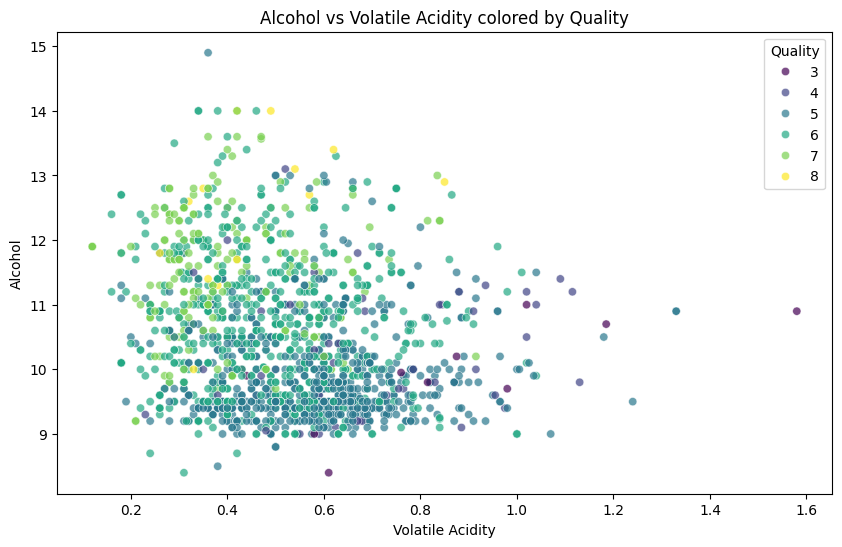

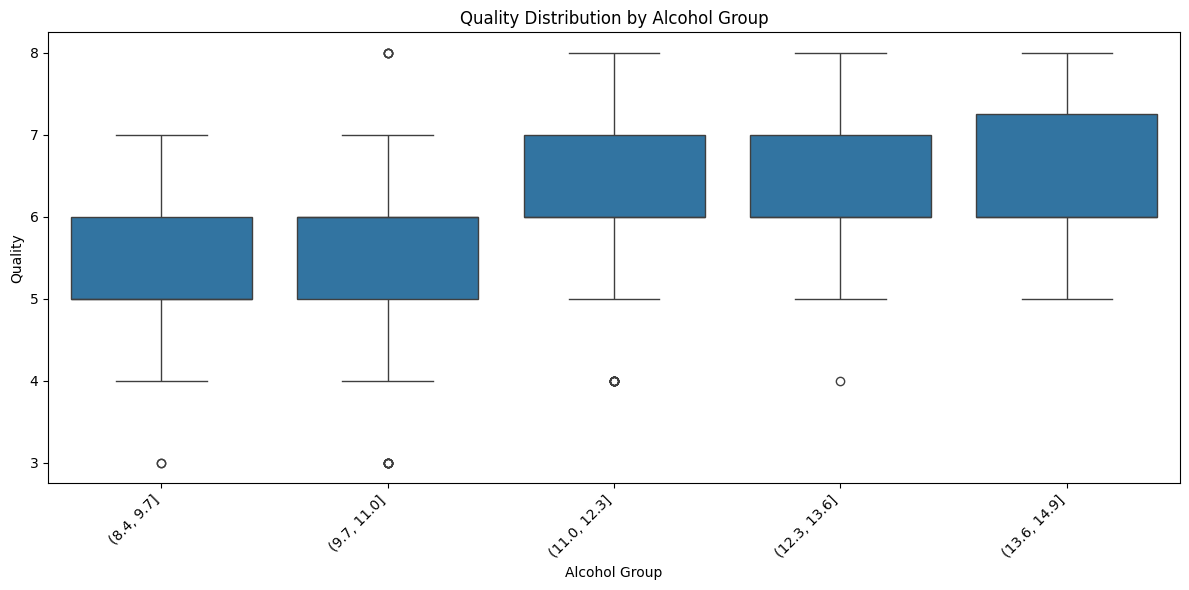

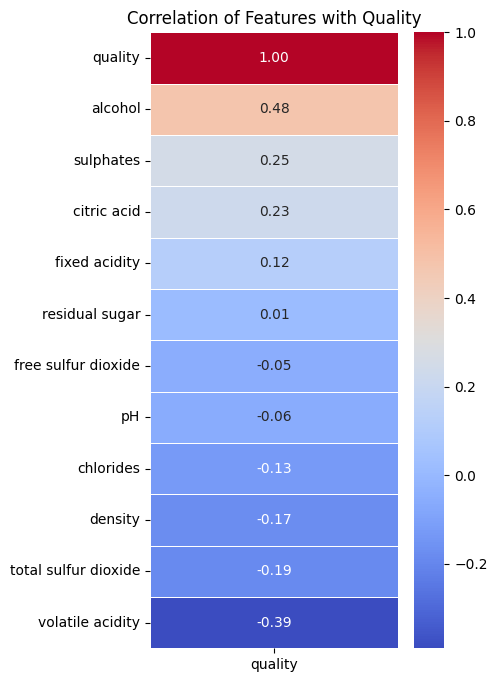

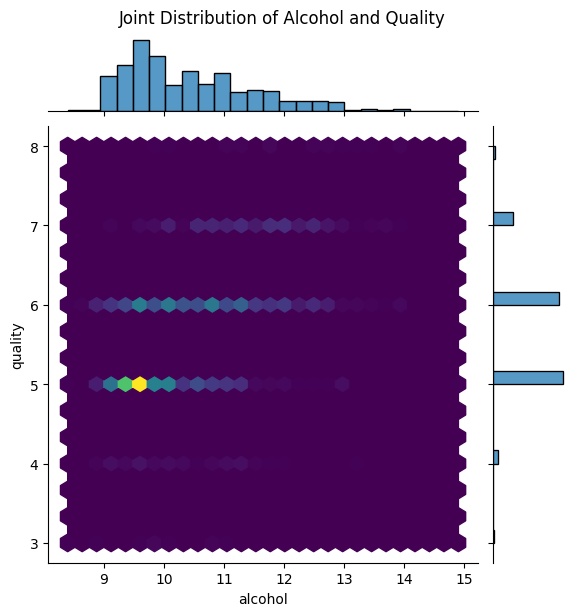

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of 'alcohol' vs 'volatile acidity', colored by 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='alcohol', hue='quality', data=df_wine, palette='viridis', alpha=0.7)
plt.title('Alcohol vs Volatile Acidity colored by Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.legend(title='Quality')
plt.show()

# 2. Box plot for 'quality' based on binned 'alcohol'
# Bin 'alcohol' into groups
df_wine['alcohol_group'] = pd.cut(df_wine['alcohol'], bins=np.linspace(df_wine['alcohol'].min(), df_wine['alcohol'].max(), 6))

plt.figure(figsize=(12, 6))
sns.boxplot(x='alcohol_group', y='quality', data=df_wine)
plt.title('Quality Distribution by Alcohol Group')
plt.xlabel('Alcohol Group')
plt.ylabel('Quality')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Drop the temporary 'alcohol_group' column
df_wine = df_wine.drop('alcohol_group', axis=1)


# 3. Heatmap focusing on correlations with 'quality'
# Select the 'quality' column and its correlations with all other columns
quality_correlation = correlation_matrix[['quality']].sort_values(by='quality', ascending=False)

plt.figure(figsize=(4, 8)) # Adjusted figure size to focus on one column
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Features with Quality')
plt.show()

# 4. Joint plot between 'alcohol' and 'quality'
sns.jointplot(x='alcohol', y='quality', data=df_wine, kind='hex', cmap='viridis')
plt.suptitle('Joint Distribution of Alcohol and Quality', y=1.02) # Add a title to the joint plot
plt.show()

## Data analysis

### Subtask:
Phân tích insight và suy luận


**Reasoning**:
Based on the correlation matrix and the visualizations created in the previous steps, I will identify the features with the strongest correlations with quality, describe the relationship based on the data, and explain the underlying winemaking principles that cause these relationships.



In [7]:
print("Dựa vào ma trận tương quan và các biểu đồ đã phân tích:")

# Bước 1 & 2: Xác định và mô tả mối tương quan mạnh nhất với chất lượng
print("\nCác đặc trưng có mối tương quan mạnh nhất với chất lượng rượu vang là:")

# Sort the quality correlations to easily identify strongest positive and negative correlations
sorted_quality_correlation = quality_correlation.sort_values(by='quality', ascending=False)

print("\n1. Alcohol (tương quan dương mạnh nhất):")
alcohol_corr = sorted_quality_correlation.loc['alcohol', 'quality']
print(f"   - Mối quan hệ: Hệ số tương quan dương là {alcohol_corr:.2f}. Biểu đồ cho thấy khi nồng độ alcohol tăng, chất lượng rượu có xu hướng tăng lên rõ rệt.")

print("\n2. Volatile Acidity (tương quan âm mạnh nhất):")
volatile_acidity_corr = sorted_quality_correlation.loc['volatile acidity', 'quality']
print(f"   - Mối quan hệ: Hệ số tương quan âm là {volatile_acidity_corr:.2f}. Biểu đồ cho thấy khi nồng độ volatile acidity tăng, chất lượng rượu có xu hướng giảm đi đáng kể.")

print("\n3. Sulphates (tương quan dương):")
sulphates_corr = sorted_quality_correlation.loc['sulphates', 'quality']
print(f"   - Mối quan hệ: Hệ số tương quan dương là {sulphates_corr:.2f}. Có xu hướng chất lượng rượu cao hơn đi kèm với nồng độ sulphates cao hơn.")

print("\n4. Citric Acid (tương quan dương):")
citric_acid_corr = sorted_quality_correlation.loc['citric acid', 'quality']
print(f"   - Mối quan hệ: Hệ số tương quan dương là {citric_acid_corr:.2f}. Có mối liên hệ tích cực giữa citric acid và chất lượng.")

# Bước 3: Giải thích cơ chế dựa trên kiến thức chuyên môn
print("\nGiải thích cơ chế dựa trên kiến thức chuyên môn về sản xuất rượu vang:")

print("\n1. Alcohol:")
print("   - Giải thích: Alcohol là thành phần chính tạo nên 'body' (độ sánh) và cảm giác ấm nóng cho rượu. Ở nồng độ phù hợp, nó giúp cân bằng độ chua và tannin, tăng cường hương thơm (do là dung môi hòa tan nhiều hợp chất mùi). Rượu có nồng độ alcohol cao hơn thường có hương vị phức tạp và hậu vị dài hơn, là yếu tố quan trọng trong đánh giá rượu vang chất lượng cao.")

print("\n2. Volatile Acidity:")
print("   - Giải thích: Volatile acidity (chủ yếu là axit axetic) là sản phẩm phụ của vi khuẩn hoặc nấm men không mong muốn. Nồng độ cao gây ra mùi giấm khó chịu, làm mất đi hương thơm trái cây tươi và làm rượu bị 'phẳng' vị. Đây là dấu hiệu rõ ràng của sự suy giảm chất lượng hoặc hư hỏng.")

print("\n3. Sulphates:")
print("   - Giải thích: Sulphates (dưới dạng SO2) là chất bảo quản thiết yếu trong rượu vang. Chúng ngăn chặn quá trình oxy hóa (làm rượu mất màu, mùi, vị) và sự phát triển của vi khuẩn, nấm men gây hại. Nồng độ sulphates đủ giúp rượu ổn định, giữ được sự tươi mới và hương vị ban đầu theo thời gian, do đó góp phần vào chất lượng tổng thể, đặc biệt cho rượu có tiềm năng lão hóa.")

print("\n4. Citric Acid:")
print("   - Giải thích: Citric acid góp phần vào tổng độ chua của rượu, mang lại cảm giác tươi mát, sắc nét trên vòm miệng, đặc biệt là ở đầu lưỡi. Độ chua cân bằng là rất quan trọng trong rượu vang đỏ, nó giúp làm nổi bật hương vị trái cây và làm mềm tannin. Nồng độ citric acid phù hợp có thể làm tăng sự sống động và độ phức tạp của rượu.")

# Bước 4: Kết hợp các insight để đưa ra bức tranh tổng thể
print("\nBức tranh tổng thể về các yếu tố hóa học chính tác động đến chất lượng rượu vang đỏ:")
print("Dữ liệu và phân tích cho thấy chất lượng rượu vang đỏ trong tập dữ liệu này chịu ảnh hưởng mạnh mẽ bởi sự cân bằng của một số đặc trưng hóa học:")
print("   - Alcohol cao (trong giới hạn) giúp tăng 'body', hương vị và hậu vị.")
print("   - Volatile Acidity thấp là cực kỳ quan trọng để tránh mùi giấm và giữ được hương thơm trái cây.")
print("   - Sulphates ở mức đủ giúp bảo quản rượu và duy trì sự tươi mới, góp phần vào tính ổn định và tiềm năng lão hóa.")
print("   - Citric Acid đóng góp vào độ chua cân bằng, mang lại cảm giác tươi mát và làm nổi bật hương vị.")
print("Sự tương tác giữa các yếu tố này, chứ không chỉ từng yếu tố riêng lẻ, cuối cùng quyết định chất lượng tổng thể của rượu. Một loại rượu vang chất lượng cao có khả năng đạt được sự hài hòa giữa nồng độ cồn, độ axit (cả cố định và dễ bay hơi), và mức độ bảo quản phù hợp.")

Dựa vào ma trận tương quan và các biểu đồ đã phân tích:

Các đặc trưng có mối tương quan mạnh nhất với chất lượng rượu vang là:

1. Alcohol (tương quan dương mạnh nhất):
   - Mối quan hệ: Hệ số tương quan dương là 0.48. Biểu đồ cho thấy khi nồng độ alcohol tăng, chất lượng rượu có xu hướng tăng lên rõ rệt.

2. Volatile Acidity (tương quan âm mạnh nhất):
   - Mối quan hệ: Hệ số tương quan âm là -0.39. Biểu đồ cho thấy khi nồng độ volatile acidity tăng, chất lượng rượu có xu hướng giảm đi đáng kể.

3. Sulphates (tương quan dương):
   - Mối quan hệ: Hệ số tương quan dương là 0.25. Có xu hướng chất lượng rượu cao hơn đi kèm với nồng độ sulphates cao hơn.

4. Citric Acid (tương quan dương):
   - Mối quan hệ: Hệ số tương quan dương là 0.23. Có mối liên hệ tích cực giữa citric acid và chất lượng.

Giải thích cơ chế dựa trên kiến thức chuyên môn về sản xuất rượu vang:

1. Alcohol:
   - Giải thích: Alcohol là thành phần chính tạo nên 'body' (độ sánh) và cảm giác ấm nóng cho rượu. Ở nồng độ phù 

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1599 entries and 12 features with no missing values.
*   Univariate analysis showed varying distributions among features; some, like `volatile acidity` and `sulphates`, exhibited potential outliers.
*   Bivariate analysis revealed key relationships:
    *   `Alcohol` has the strongest positive correlation with `quality` (\$0.48\$).
    *   `Volatile acidity` has the strongest negative correlation with `quality` (\$-0.39\$).
    *   `Sulphates` (\$0.25\$) and `citric acid` (\$0.23\$) also show positive correlations with `quality`.
    *   Box plots demonstrated a clear trend of increasing median `quality` with increasing `alcohol` content and decreasing `volatile acidity`.
*   Integrating domain knowledge confirmed that high `alcohol` contributes to body and aroma, low `volatile acidity` is crucial to avoid spoilage smells, `sulphates` preserve the wine, and `citric acid` adds freshness, aligning with observed data trends.

### Insights or Next Steps

*   Focus on optimizing `alcohol` content and minimizing `volatile acidity` during production to improve quality.
*   Further investigate the optimal ranges for `sulphates` and `citric acid` to maximize quality while considering potential negative effects of excessive levels.
